Transcripts of earnings calls can be used to learn about stock price behavior

The purpose of this project is to outline the different steps involved in analyzing and modeling data. Step 1: Download the data To begin the analysis, it is necessary to obtain the necessary data. Step 2: Load the data into the analysis environment after downloading it. This could include downloading datasets from online sources or retrieving data from a database. Step 3: Exploratory data analysis This typically involves reading the data into a suitable data structure such as a dataframe or array, depending on the tools and libraries being used. During this step, we analyze data structure and properties, identify outliers and missing values, and use visualizations and summary statistics to gain insights. Step 4: Convert text to word embeddings If the data includes text, it may be necessary to convert it into a numerical representation that can be used in modeling. Step 5: Benchmark ARIMA model This step builds and evaluates a benchmark ARIMA (AutoRegressive Integrated Moving Average) model. Step 6: Benchmark LSTM price model We construct and evaluate another benchmark model, specifically an LSTM (Long Short-Term Memory) model. Step 7: ConvNet feature extraction When processing certain types of data, such as images, feature extraction is essential. Convolutional Neural Networks (ConvNets) are often used to extract relevant features from images, enabling further analysis or modeling tasks.

Step 8: LSTM price+text model
Finally, a more advanced model that combines both price data and text data is developed using LSTM. This model aims to leverage the information from multiple sources to make improved predictions or classifications. Data can be analyzed, transformed, and modeled effectively by following these steps.

A brief overview 

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
import seaborn as sns
sns.set()
import matplotlib.cm as cm

# Enable logging
import logging
import sys
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

The following code snippet performs several tasks: Pandas, numpy, matplotlib.pyplot, seaborn, and matplotlib.cm are imported. Data manipulation, visualization, and logging are provided by these libraries. The line `%matplotlib inline` in the Jupyter Notebook allows matplotlib plots to be displayed directly inside the notebook. The line `plt.style.use('seaborn-notebook')` defines the plotting style as "seaborn-notebook," which is a predefined style provided by the Seaborn library for better visual appeal. This line sets the default seaborn theme for visualizations. A logging module is imported and basic logging settings are configured. The log messages are formatted so that they include the timestamp, log level, and message content (such as DEBUG, INFO, WARNING, ERROR, etc.). By importing the necessary libraries, setting up plotting styles, enabling logging, and ensuring matplotlib plots are displayed inline in a Jupyter Notebook, this code creates the environment for data analysis and visualization.

A file containing relevant information downloaded from Wikipedia can be used to obtain a list of S&P 500 companies. In addition to using the ticker symbols from the list, additional features such as 'GICS_sector' and 'GICS_sub_industry' may be useful.

In [85]:
column_names = ['ticker', 'security', 'filings', 'GICS_sector', 'GICS_sub_industry', 'HQ_address', 'date_added', 'CIK']
sp500companies = pd.read_csv('data/S&P500.csv', header = 0, names = column_names).drop(['filings'], axis=1)
sp500companies = sp500companies.set_index(['ticker'])
sp500companies.head(10)

security             GICS_sector  \
ticker                                                       
MMM                     3M Company             Industrials   
ABT            Abbott Laboratories             Health Care   
ABBV                   AbbVie Inc.             Health Care   
ACN                  Accenture plc  Information Technology   
ATVI           Activision Blizzard  Information Technology   
AYI              Acuity Brands Inc             Industrials   
ADBE             Adobe Systems Inc  Information Technology   
AMD     Advanced Micro Devices Inc  Information Technology   
AAP             Advance Auto Parts  Consumer Discretionary   
AES                       AES Corp               Utilities   

                                   GICS_sub_industry  \
ticker                                                 
MMM                         Industrial Conglomerates   
ABT                            Health Care Equipment   
ABBV                                 Pharmaceuticals   
ACN                   IT Consulting & Other Services   
ATVI                     Home Entertainment Software   
AYI                Electrical Components & Equipment   
ADBE                            Application Software   
AMD                                   Semiconductors   
AAP                                Automotive Retail   
AES     Independent Power Producers & Energy Traders   

                      HQ_address date_added      CIK  
ticker                                                
MMM          St. Paul, Minnesota        NaN    66740  
ABT      North Chicago, Illinois    3/31/64     1800  
ABBV     North Chicago, Illinois   12/31/12  1551152  
ACN              Dublin, Ireland     7/6/11  1467373  
ATVI    Santa Monica, California    8/31/15   718877  
AYI             Atlanta, Georgia     5/3/16  1144215  
ADBE        San Jose, California     5/5/97   796343  
AMD        Sunnyvale, California    3/20/17     2488  
AAP            Roanoke, Virginia     7/9/15  1158449  
AES          Arlington, Virginia        NaN   874761

This code snippet performs the following operations on a dataset: First, it defines a list of column names that will be used to label the S&P 500 companies' attributes. These column names include 'ticker', 'security', 'filings', 'GICS_sector', 'GICS_sub_industry', 'HQ_address', 'date_added', and 'CIK'. The code then reads a CSV file named 'S&P500.csv'. The header parameter is set to 0, which indicates that the column headers appear in the first row of the file. The names parameter assigns the previously defined column_names list as column headers for the resulting pandas DataFrame, which is stored in the variable 'sp500companies'. Through the use of the drop() function, the code drops the 'filings' column from the 'sp500companies' DataFrame. We are dropping columns by setting the axis parameter to 1. As a result, the updated DataFrame no longer includes the 'filings' column. By using the set_index() function, the code sets the index of the 'sp500companies' DataFrame to the 'ticker' column. This operation modifies the DataFrame so that the 'ticker' column serves as the row index, which can provide convenient access to data based on ticker symbols. Finally, the code displays the first 10 rows of the modified 'sp500companies' DataFrame. For the initial portion of the DataFrame, this gives us a preview, allowing us to examine the column names and values. In summary, this code reads a CSV file containing information about S&P 500 companies, creates a DataFrame with the column names provided, removes the 'filings' column, sets the 'ticker' column as the index, and displays a subset of the resulting DataFrame to provide an overview of the data.

You can download the price data here.

To download S&P 500 company prices between two specified dates, run the cell below.

In [805]:
import pandas_datareader as pdr

start = pd.to_datetime('2009-01-01')
end = pd.to_datetime('2017-01-01')
source = 'google'

for company in sp500companies.index:
    try:
        price_data = pdr.DataReader(company, source, start, end)
        price_data['Close'].to_csv('data/company_prices/%s_adj_close.csv' % company)
    except:
        logging.error("Oops! %s occured for %s. \nMoving on to next entry." % (sys.exc_info()[0], company))

This code snippet carries out the following tasks: Importing the pandas_datareader library and aliasing it to 'pdr'. This library provides functionality to fetch financial data from various online sources. Next, pd.to_datetime() is used to assign dates to variables 'start' and 'end'. This is the range for which price data can be retrieved, with 'start' representing January 1, 2009, and 'end' representing January 1, 2017. The variable 'source' is set to 'google', which indicates where the price data will be retrieved from. Within the loop, a search for price data for each company in the index of the 'sp500companies' DataFrame, representing the S&P 500 companies, is attempted. Function pdr.DataReader(). The function takes parameters such as the company symbol, the data source ('google'), and the start and end dates. The retrieved price data is stored in the 'price_data' variable. The closing prices of the company's stock are then saved as a CSV file in the 'close' column of the price_data DataFrame. Using the to_csv() function, the data is exported and saved in the 'data/company_prices/' directory. The file name is based on the company symbol, with '_adj_close.csv' appended. When an exception occurs during the retrieval of price data, a try-except block is used to handle it. Using the logging.error() function, an error message is logged, containing information about the specific exception and the company. This allows the code to continue executing for the remaining companies in the loop. In summary, this code retrieves historical price data from Google for each S&P 500 company. Each company's closing price is saved as an individual CSV file in the 'data/company_prices/' directory. Error messages are logged if any exceptions occur during the retrieval process.

The data should be loaded

Transcript data should be loaded

In [2]:
# Read in a collection of company transcripts
def load_company_transcripts(company):
    '''
    Reads a company's transcripts into a Pandas DataFrame. 
    
    Args:
        company: The ticker symbol for the desired company. 
    '''
    logging.debug('Reading company transcripts for {}'.format(company))
    
    # Read file
    text_data = pd.read_json('data/company_transcripts/{}.json'.format(company), lines=True)
    
    # Drop events that don't have an associated date
    text_data = text_data.dropna(axis = 0, subset= ['date'])
    
    # Reindex according to the date
    text_data = text_data.set_index('date').sort_index()
    
    # Check for possible duplicate entries from scraping
    if sum(text_data.duplicated(['title'])) > 0:
        logging.warning('{} duplicates removed from file'.format(sum(text_data.duplicated(['title']))))
        text_data = text_data.drop_duplicates(['title'])
               
    # Concatenate body into single body of text
    text_data['body'] = text_data['body'].apply(lambda x: ' '.join(x))
    
    # Add a column to each transcript for word count, plot histogram
    text_data['count'] = text_data['body'].apply(lambda x: len(x.split()))
    
    # Check for empty transcripts
    if len(text_data[text_data['count'] == 0]) > 0:
        logging.warning('{} empty transcripts removed from file'.format(len(text_data[text_data['count'] == 0])))
    text_data = text_data[text_data['count'] != 0]
    
    return text_data

In this code, a function 'load_company_transcripts' loads and processes transcripts of a specified company into a pandas DataFrame. The function takes a company's ticker symbol as an argument and reads the corresponding transcripts from a JSON file located in the 'data/company_transcripts/' directory. By dropping rows with missing values in the 'date' column after reading the file, the code removes events that do not have an associated date and reindexes the DataFrame. The code checks for duplicated 'title' values and removes any duplicate rows if they are found based on the 'date' column. When duplicates have been removed, a warning message is logged. Transcript text is concatenated into a single body of text by joining the individual strings with whitespace in the 'body' column. Each transcript's word count is represented by a new column called 'count' in the DataFrame. A histogram of the word counts can be plotted if desired. After that, empty transcripts are removed by filtering out rows with zero word counts. As a result of removing empty transcripts, a warning message is logged. The 'load_company_transcripts' function returns the processed DataFrame as output.

In summary, this code defines a function that reads and preprocesses transcripts of a specified company. A number of operations are performed, including dropping rows with missing dates, removing duplicate entries, concatenating transcript text, adding a word count column, and filtering out empty rows. Afterward, the processed DataFrame is returned for further analysis.

Data loading for prices

In [3]:
def load_company_price_history(companies, normalize = False, fillna = True, dropna=True):
    ''' 
    Builds a DataFrame where each column contains one company's adjusted closing price history.
    
    Args:
        companies: A list of company ticker symbols to load.
        normalize: Boolean flag to calculate the log-returns from the raw price data. 
        fillna: Boolean flag to fill null values. Limited fill up to 5 days forward and 1 day backward,
        for companies with long periods of null values, this prevents from creating a stagnant time series.
        Instead, those companies should be dropped using `dropna=true`.
        dropna: Boolean flag to drop companies that don't have a full price history. 
         
    '''
    prices = []
    for company in companies:
        logging.debug('Reading company prices for {}'.format(company))
        price_history = pd.read_csv('data/company_prices/{}_adj_close.csv'.format(company), 
                                    names=[company], index_col=0)
        prices.append(price_history)
        
    df = pd.concat(prices, axis=1)
    df.index = pd.to_datetime(df.index)
    df = df.asfreq('B', method='ffill')
   
    if normalize:
        df = np.log(df).diff() # Calculate the log-return, first value becomes null
        df.iloc[0] = df.iloc[1] # Forward fill the null value
        
    if fillna:
        df = df.fillna(method = 'ffill', limit=5) # First pass fill NAs as previous day price
        df = df.fillna(method = 'bfill', limit=1) # For NAs with no prev value (ie. first day), fill NA as next day price
    
    if dropna:
        # Validate quality of data (null values, etc)
        # Drop any companies that don't have a full 8-year history
        df = df.dropna(axis=1, how='any')
        assert df.isnull().values.any() == 0
        logging.debug('Null values found after cleaning: {}'.format(df.isnull().values.any()))
        
    
    return df

This code defines a function called 'load_company_price_history' that builds a DataFrame containing the adjusted closing price history for a list of companies.  The function takes the following arguments: 'companies' (a list of company ticker symbols to load), 'normalize' (a boolean flag to calculate the log-returns from the raw price data), 'fillna' (a boolean flag to fill null values in the DataFrame), and 'dropna' (a boolean flag to drop companies without a complete price history). For each company's price history, a list called 'prices' is initialized in the function. Following the iteration of the 'companies' list, the code reads the price history from the CSV file in the 'data/company_prices/' directory and adds it to the 'prices' list. Using pd.concat(), the 'prices' list is concatenated along the column axis to create the final DataFrame named 'df'. The index is converted to a datetime format The DataFrame is then resampled to a business day frequency ('B') and forward-filled so that a price value is assigned to each business day. When the 'normalize' flag is set to True, the log-returns are calculated by taking the logarithmic difference between consecutive values. It is forward-filled with the second value when the first log-return value becomes null. Null values in a DataFrame are filled using a forward-fill method with a limit of 5 days and a backward-fill method with a limit of 1 day if the 'fillna' flag is set to True. 'dropna' flags that contain null values (which are removed from the DataFrame) are discarded. A cleaned and processed DataFrame is returned by the function. This code reads and processes the adjusted closing price histories of a list of companies. A DataFrame is created with each column representing a company's price history. There are options to normalize the data, fill null values, and drop companies with incomplete price histories. Afterwards, the cleaned DataFrame is returned for further analysis.

## Load all available data from the file directory

In [4]:
# Go to data folder and get list of all companies that have data
import glob
import re

# All files for price history
price_files = glob.glob('data/company_prices/*_adj_close.csv')
company_prices = [re.search(r'(?<=data\/company_prices\/)(.*)(?=_adj_close.csv)', f).group(0) 
                  for f in price_files]
logging.info('{} company price histories available.'.format(len(company_prices)))

# All files for transcripts
transcript_files = glob.glob('data/company_transcripts/*.json')
company_transcripts = [re.search(r'(?<=data\/company_transcripts\/)(.*)(?=.json)', f).group(0) 
                       for f in transcript_files]
logging.info('{} company transcripts available.'.format(len(company_transcripts)))

# Intersection of two datasets
company_both = list(set(company_prices) & set(company_transcripts))
logging.info('{} companies have both transcripts and price history available.'.format(len(company_both)))

2017-10-04 09:52:44,215 - INFO - 502 company price histories available.
2017-10-04 09:52:44,219 - INFO - 173 company transcripts available.
2017-10-04 09:52:44,220 - INFO - 170 companies have both transcripts and price history available.


This code performs the following actions: First, it imports the 'glob' and 're' libraries. 'glob' allows for file path expansion and retrieval, while 're' provides regular expression functionality. For example, 'glob.glob()' returns a list of file paths that match 'data/company_prices/*_adj_close.csv'. In the 'data/company_prices/' directory, this pattern corresponds to all files ending in '_adj_close.csv'. The resulting list of file paths is stored in the 'price_files' variable. The company ticker symbols are then extracted using a list comprehension. A regular expression pattern is used to extract the desired portion of each file path in 'price_files' using the 're.search()' function. It logs an informational message indicating how many company price histories are available. The extracted ticker symbols are stored in the 'company_prices' list. We also use 'glob.glob()' to retrieve the file paths matching the pattern 'data/company_transcripts/*.json'. The pattern corresponds to all files ending in '.json' in the 'data/company_transcripts/' directory. The resulting list of file paths is stored in the 'transcript_files' variable. Similar to the previous step, another list comprehension is used to extract the company ticker symbols from the transcript file paths. An informational log message is generated to indicate the number of company transcripts available. The extracted ticker symbols are stored in the 'company_transcripts' list. Using the 'set()' function and the '&' operator, the code calculates the intersection of the 'company_prices' and 'company_transcripts' lists. Both price history and transcript data are available for these companies. To indicate the number of companies that have both transcripts and price history available, an informational log message is generated to indicate the number of companies that have both ticker symbols stored in the 'company_both' list. This code identifies the price history and transcript files available for the company in the 'data' directory. In addition to retrieving the ticker symbols from the file paths, it logs the number of price histories, transcripts, and companies that have both transcripts and price histories available. Further analysis or data processing can benefit from this information.

In [5]:
# Load all pricing data into memory
company_price_df = load_company_price_history(company_both, normalize=True)

2017-10-04 09:52:45,676 - DEBUG - Reading company prices for ECL
2017-10-04 09:52:45,680 - DEBUG - Reading company prices for AAL
2017-10-04 09:52:45,683 - DEBUG - Reading company prices for XRAY
2017-10-04 09:52:45,686 - DEBUG - Reading company prices for CVX
2017-10-04 09:52:45,689 - DEBUG - Reading company prices for ACN
2017-10-04 09:52:45,692 - DEBUG - Reading company prices for COF
2017-10-04 09:52:45,696 - DEBUG - Reading company prices for DISCK
2017-10-04 09:52:45,699 - DEBUG - Reading company prices for AXP
2017-10-04 09:52:45,702 - DEBUG - Reading company prices for CVS
2017-10-04 09:52:45,705 - DEBUG - Reading company prices for AMGN
2017-10-04 09:52:45,708 - DEBUG - Reading company prices for CNP
2017-10-04 09:52:45,711 - DEBUG - Reading company prices for DD
2017-10-04 09:52:45,714 - DEBUG - Reading company prices for SCHW
2017-10-04 09:52:45,717 - DEBUG - Reading company prices for APD
2017-10-04 09:52:45,720 - DEBUG - Reading company prices for DVN
2017-10-04 09:52:45,7

2017-10-04 09:52:46,121 - DEBUG - Reading company prices for AMAT
2017-10-04 09:52:46,124 - DEBUG - Reading company prices for BMY
2017-10-04 09:52:46,127 - DEBUG - Reading company prices for MO
2017-10-04 09:52:46,130 - DEBUG - Reading company prices for CF
2017-10-04 09:52:46,133 - DEBUG - Reading company prices for AIG
2017-10-04 09:52:46,136 - DEBUG - Reading company prices for CME
2017-10-04 09:52:46,139 - DEBUG - Reading company prices for CPB
2017-10-04 09:52:46,142 - DEBUG - Reading company prices for DG
2017-10-04 09:52:46,145 - DEBUG - Reading company prices for BK
2017-10-04 09:52:46,149 - DEBUG - Reading company prices for CSX
2017-10-04 09:52:46,153 - DEBUG - Reading company prices for XEC
2017-10-04 09:52:46,156 - DEBUG - Reading company prices for AMP
2017-10-04 09:52:46,160 - DEBUG - Reading company prices for CAT
2017-10-04 09:52:46,163 - DEBUG - Reading company prices for CAG
2017-10-04 09:52:46,167 - DEBUG - Reading company prices for CTAS
2017-10-04 09:52:46,170 - D

This code snippet performs the following action: It calls the 'load_company_price_history' function to load the pricing data for companies that have both transcripts and price histories. There are two arguments in the function: the ticker symbols of the companies with both data, as well as a boolean flag 'normalize' set to True, which indicates that the pricing data should be normalized by calculating the log-returns. 'load_company_price_history' creates a DataFrame that displays the adjusted closing price history for each company in the list 'company_both'. 'normalize' flag sets to True calculates log-returns from raw price data, which is assigned to the 'company_price_df' variable containing pricing data for the selected companies.

In summary, this code loads the pricing data for the companies that have both transcripts and price history available, and stores the data in the 'company_price_df' DataFrame for further analysis or use.

In [6]:
# Load all transcript data into memory
company_transcripts_dict = {}
failures= []

for company in company_transcripts:
    try:
        company_transcripts_dict[company] = load_company_transcripts(company)
    except:
        logging.error("Oops! {} occured for {}. \nMoving on to next entry.".format(sys.exc_info()[0], company))
        failures.append(company)

2017-10-04 09:52:51,910 - DEBUG - Reading company transcripts for A
2017-10-04 09:52:51,979 - DEBUG - Reading company transcripts for AAL
2017-10-04 09:52:52,080 - DEBUG - Reading company transcripts for AAP
2017-10-04 09:52:52,150 - DEBUG - Reading company transcripts for AAPL
2017-10-04 09:52:52,213 - DEBUG - Reading company transcripts for ABBV
2017-10-04 09:52:52,251 - DEBUG - Reading company transcripts for ABC
2017-10-04 09:52:52,314 - DEBUG - Reading company transcripts for ABT
2017-10-04 09:52:52,345 - WARNING - 1 duplicates removed from file
2017-10-04 09:52:52,422 - DEBUG - Reading company transcripts for ACN
2017-10-04 09:52:52,483 - DEBUG - Reading company transcripts for ADBE
2017-10-04 09:52:52,546 - DEBUG - Reading company transcripts for ADI
2017-10-04 09:52:52,548 - ERROR - Oops! <class 'KeyError'> occured for ADI. 
Moving on to next entry.
2017-10-04 09:52:52,549 - DEBUG - Reading company transcripts for ADM
2017-10-04 09:52:52,580 - WARNING - 2 duplicates removed fro

2017-10-04 09:52:58,818 - WARNING - 1 duplicates removed from file
2017-10-04 09:52:58,901 - DEBUG - Reading company transcripts for CMI
2017-10-04 09:52:58,962 - DEBUG - Reading company transcripts for CNC
2017-10-04 09:52:59,010 - DEBUG - Reading company transcripts for CNP
2017-10-04 09:52:59,061 - DEBUG - Reading company transcripts for COF
2017-10-04 09:52:59,138 - DEBUG - Reading company transcripts for COG
2017-10-04 09:52:59,194 - DEBUG - Reading company transcripts for COH
2017-10-04 09:52:59,255 - DEBUG - Reading company transcripts for COO
2017-10-04 09:52:59,306 - DEBUG - Reading company transcripts for COP
2017-10-04 09:52:59,377 - WARNING - 43 duplicates removed from file
2017-10-04 09:52:59,454 - DEBUG - Reading company transcripts for COST
2017-10-04 09:52:59,553 - DEBUG - Reading company transcripts for COTY
2017-10-04 09:52:59,585 - DEBUG - Reading company transcripts for CPB
2017-10-04 09:52:59,645 - DEBUG - Reading company transcripts for CSCO
2017-10-04 09:52:59,73

This code snippet performs the following actions: Initializes a dictionary named 'company_transcripts_dict' to store transcript data for each company. The transcript data loading failures are also tracked through an empty list called 'failures'. The code enters a loop that iterates over each company in the 'company_transcripts' list, which contains the ticker symbols of companies with available transcripts. By using the 'load_company_transcripts' function, transcripts for each company are attempted to be loaded within the loop. The function takes the company ticker symbol as an argument and returns the transcript data as a pandas DataFrame. An error message is logged if an exception occurs when loading transcript data. Information about the specific exception and the company name is included in the message. To keep track of failed attempts, the company ticker symbol is appended to the 'failures' list. No matter if an exception occurs, the code continues to execute for the remaining companies in the loop. As a result, this code loads transcript data from the 'company_transcripts' list into a dictionary called 'company_transcripts_dict'. The corresponding company ticker symbol is added to the 'failures' list if any exceptions occur during the loading process. In this way, transcript data loading failures can be identified.

In [7]:
failures

['ADI', 'BHF', 'CTHS', 'ED', 'ETN']

In this code snippet, the ticker symbols of companies for which transcript data loading failed are retrieved and stored. 

Failures is a list of ticker symbols of companies whose transcript data loading failed. 

When an exception occurs during loading, these ticker symbols are added to the 'failures' list. 

It serves as a record of companies for which transcript data retrieval failed. Further analysis or troubleshooting can be performed using it.

The files for these failures were all empty.

For further inspection, sample a few companies

In [8]:
# Select companies to load and inspect
google_transcripts = company_transcripts_dict['GOOG']
amazon_transcripts = company_transcripts_dict['AMZN']
adobe_transcripts = company_transcripts_dict['ADBE']
apple_transcripts = company_transcripts_dict['AAPL']

transcript_samples = [google_transcripts, amazon_transcripts, adobe_transcripts, apple_transcripts]

google_prices = company_price_df['GOOG']
amazon_prices = company_price_df['AMZN']
adobe_prices = company_price_df['ADBE']
apple_prices = company_price_df['AAPL']

price_samples = load_company_price_history(['GOOG', 'AMZN', 'ADBE', 'AAPL'], normalize=True)

2017-10-04 09:54:54,836 - DEBUG - Reading company prices for GOOG
2017-10-04 09:54:54,843 - DEBUG - Reading company prices for AMZN
2017-10-04 09:54:54,847 - DEBUG - Reading company prices for ADBE
2017-10-04 09:54:54,850 - DEBUG - Reading company prices for AAPL
2017-10-04 09:54:54,899 - DEBUG - Null values found after cleaning: False


This code snippet performs the following actions: It selects specific companies' transcript data and assigns it to different variables. A transcript for a company with ticker symbols 'GOOG', 'AMZN', 'ADBE', and 'AAPL' is stored in the variables 'google_transcripts', 'amazon_transcripts', 'adobe_transcripts', and 'apple_transcripts', respectively. 'Transcript_samples' is then compiled from these transcript variables, which serve as a collection of selected transcript data for further analysis. In the same way, the code assigns price data for the same set of companies to separate variables. A price data set for Google, Amazon, Adobe, and Apple is stored in variables 'google_prices', 'amazon_prices', 'adobe_prices', and 'apple_prices', respectively. To load and normalize the price data for these companies, the 'load_company_price_history' function is invoked with the ticker symbols 'GOOG', 'AMZN', 'ADBE', and 'AAPL' as arguments. The resulting price data is stored in the variable 'price_samples'. To summarize, this code selects transcripts and prices for specific companies. The script creates a list ('transcript_samples') with the selected transcript data and stores the price data separately for each company. Additionally, it loads and normalizes the price data for the selected companies, storing the result in the 'price_samples' variable.

In [9]:
google_transcripts

analysts  \
date                                                            
2006-02-01  [Heath Terry, Credit Suisse First Boston  Anth...   
2006-10-17  [Edward Snyder - Charter Equity Research  Ehud...   
2006-10-19  [Mark Mahaney - Citigroup ,  Robert Peck – Bea...   
2007-01-19  [Edward Snyder - Charter Equity Research ,  It...   
2007-01-31  [Anthony Noto - Goldman Sachs ,  Mark Mahaney ...   
2007-04-18  [Scott Coleman - Morgan Stanley ,  Phil Cusick...   
2007-04-19                                      Parsing error   
2007-07-19  [Anthony Noto - Goldman Sachs ,  Imran Khan – ...   
2007-07-19  [Tim Long - Banc of America Securities ,  Matt...   
2007-10-18  [Imran Khan - J.P. Morgan, Anthony Noto - Gold...   
2007-10-25  [, Jim Suva - Citigroup, Phil Cusick - Bear St...   
2008-01-23  [Matthew Hoffman - Cowen, Mike Walkley - Piper...   
2008-01-31  [Imran Khan - J.P. Morgan, Douglas Anmuth - Le...   
2008-04-18  [Ben Schachter - UBS Securities, Justin Post -...   
2008-04-24  [Maynard Um - UBS, Phil Cusick - Bear Stearns,...   
2008-07-17  [Imran Khan - JP Morgan, Brian Pitz - Banc of ...   
2008-07-31  [Nathan Johnson - Pacific Crest, Ehud Gelblum ...   
2008-10-16  [Imran Khan - JPMorgan, Mark Mahaney - Citi, B...   
2008-10-30  [Ittai Kidron - Oppenheimer, Jim Suva - Citi, ...   
2009-01-22  [Ben Schachter - UBS, Imran Khan - JPMorgan, J...   
2009-02-03  [, Vivek Arya - Merrill Lynch, Samuel Wilsom -...   
2009-04-17  [James Mitchell - Goldman Sachs, Justin Post -...   
2009-04-30  [Vivek Arya - Merrill Lynch, Samuel Wilsom - J...   
2009-07-16  [Imran Khan - J.P. Morgan, Mark Mahaney - Citi...   
2009-07-30  [Tim Long - BMO Capital Markets, Phil Cusick -...   
2009-10-15  [Mark May - Needham & Company, Imran Khan - JP...   
2009-10-29  [Ittai Kidron – Oppenheimer & Co., Mark Sue – ...   
2010-01-21  [Samit Sinha – JMP Securities, Aaron Kessler –...   
2010-01-21  [James Mitchell - Goldman Sachs, Mark Mahaney ...   
2010-01-28  [Ittai Kidron – Oppenheimer Funds, Tavis McCou...   
...                                                       ...   
2010-07-30  [Tal Liani - BofA Merrill Lynch, Richard Krame...   
2010-10-14  [James Mitchell – Goldman Sachs, Spencer Wang ...   
2010-10-28  [Tal Liani - BofA Merrill Lynch, Maynard Um - ...   
2011-01-21  [Scott Devitt - Morgan Stanley, Steve Weinstei...   
2011-04-15  [Scott Devitt - Morgan Stanley, Brian Pitz - U...   
2011-07-14  [Brian Pitz - UBS Investment Bank, Spencer Wan...   
2011-07-28  [, Ittai Kidron – Oppenheimer & Co, Brian Modo...   
2011-10-13  [Jeetil J. Patel - Deutsche Bank AG, Research ...   
2012-01-19  [Herman Leung - Susquehanna Financial Group, L...   
2012-04-12  [Spencer Wang - Crédit Suisse AG, Research Div...   
2012-07-19  [Mark S. Mahaney – Citigroup, Spencer Wang – C...   
2012-10-18  [Ross A. Sandler – Deutsche Bank Securities, I...   
2013-01-22  [Carlos Kirjner - Bernstein, Ben Schachter - M...   
2013-04-18  [Mark Mahaney – RBC Capital Markets LLC, Ben S...   
2013-07-18  [Ross Sandler - Deutsche Bank, Ben Schachter -...   
2013-10-17  [Mark Mahaney - RBC Capital Markets LLC, Ben S...   
2014-01-30  [Carlos Kirjner - Sanford C. Bernstein & Co., ...   
2014-04-16  [Ben Schachter - Macquarie, Douglas Anmuth - J...   
2014-07-17  [Mark Mahaney - RBC Capital Markets, Eric Sher...   
2014-10-16  [Eric Sheridan - UBS, Justin Post - Bank of Am...   
2015-01-29  [Stephen Ju - Credit Suisse, Carlos Kirjner - ...   
2015-04-23  [Carlos Kirjner – Bernstein, Mark Mahaney – RB...   
2015-07-16  [Ross Sandler – Duetsche Bank, Carlos Kirjner ...   
2015-10-22  [Mark Mahaney - RBC Capital Markets, Ross Sand...   
2016-04-21  [Eric J. Sheridan - UBS Securities LLC, Carlos...   
2016-07-28  [Carlos Kirjner-Neto - Sanford C. Bernstein & ...   
2016-10-27  [Eric J. Sheridan - UBS Securities LLC, Heathe...   
2017-01-26  [Heather Bellini - Goldman Sachs & Co., Eric J...   
2017-04-27  [Douglas T. Anmuth - JPMorgan Securities LLC, ...   
2017-07-24  [Eric Sheri

This code snippet retrieves and stores the transcript data specifically for the company with the ticker symbol 'GOOG', which is Google.

Google's transcript data is stored in the variable 'google_transcripts'. A transcript data set can be analyzed further for a variety of purposes, including sentiment analysis, natural language processing, and extracting insights from the textual content.

Analyzing exploratory data

In [13]:
# Calculate average word count across all company transcripts
companies_avg_word_count = []

for company in company_transcripts_dict:
    company_avg = company_transcripts_dict[company]['count'].mean()
    companies_avg_word_count.append(company_avg)
    
print('Average word count in transcripts: {}'.format(np.mean(np.array(companies_avg_word_count))))

Average word count in transcripts: 9449.255561736534


The code snippet performs the following actions: It calculates the average word count for all company transcripts in the dictionary 'company_transcripts_dict'. The code iterates over each company in the dictionary 'company_transcripts_dict'. The code retrieves the transcript DataFrame for each company within the loop by using 'company_transcripts_dict[company]'. After that, it calculates the average word count for each company by applying the mean() function to the 'count' column of the transcript DataFrame. The calculated average word count for each company is added to the 'companies_avg_word_count' list.  Finally, the code prints the average word count across all company transcripts by calculating the mean of the 'companies_avg_word_count' list using the np.mean() function.  In summary, this code calculates the average word count for each company's transcript and The average word count across all company transcripts is then calculated. As an output, the average length of the transcripts is displayed.

<a id='step1'></a> ### Visualize the loaded transcripts

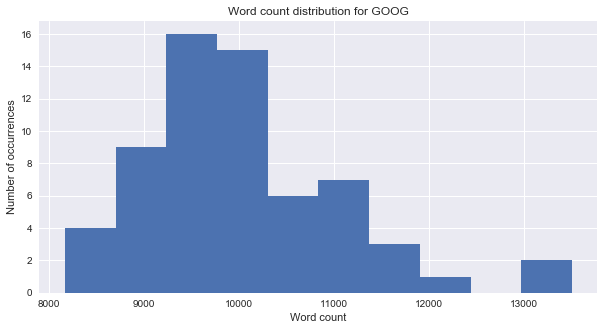

In [24]:
# Plot histogram of word counts for company transcripts
def visualize_word_count(transcripts):
    '''
    Plots a histogram of a company's transcript word counts.
    
    Args:
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    
    company = transcripts['company'][0]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(transcripts['count'])
    plt.title("Word count distribution for {}".format(company))
    ax.set_xlabel('Word count')
    ax.set_ylabel('Number of occurrences')

for company in transcript_samples:
    visualize_word_count(company)

This code snippet performs the following actions: plotting a histogram of a company's transcript data using the function 'visualize_word_count'. The function takes a Pandas DataFrame containing the transcript data as an argument. The company name is extracted from the transcript data using 'transcripts['company'][0]'. The value of the 'company' column is taken from the first row of the DataFrame. Figure and axis objects are created using 'plt.subplots(figsize=(10,5))', specifying the figure's size. A histogram of word counts is plotted using 'ax.hist(transcripts['count'])', where 'transcripts['count']' refers to a column that contains the word counts. Title, x-axis label, and y-axis label are set for the plot. The code enters a loop that This function iterates over each company in the 'transcript_samples' list, which contains selected transcript data from multiple companies. Within the loop, the 'visualize_word_count' function is called for each company's transcript data, creating a histogram plot of the word counts for that company. By plotting a histogram, this code lets you visualize the word count distribution for a company's transcript data. A separate histogram is produced for each company's transcript data in the 'transcript_samples' list. Transcripts from different companies can be compared visually based on word counts.

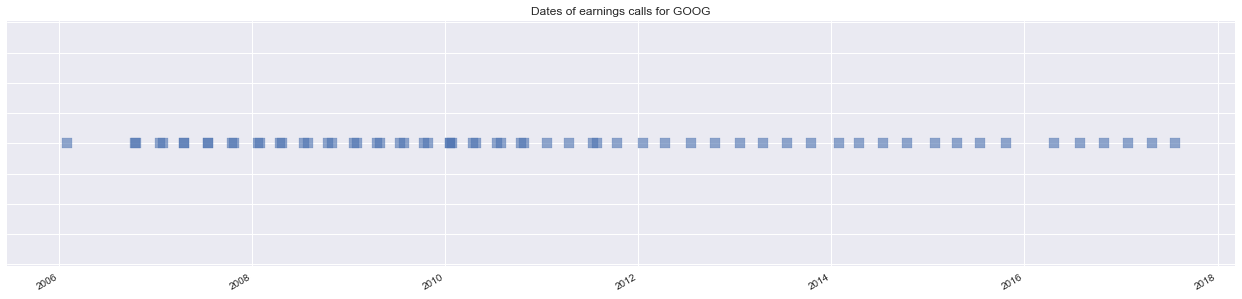

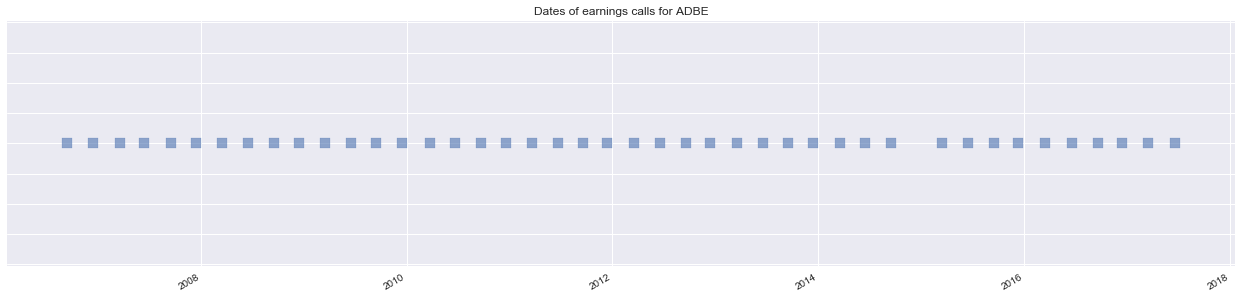

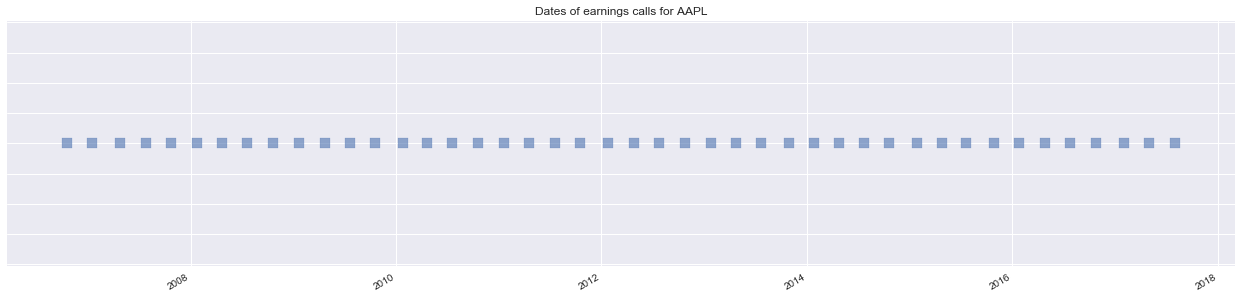

In [25]:
# Visualize transcript dates
def visualize_dates(transcripts):
    '''
    Plots the dates of a company's earning calls.
    
    Args:
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    
    company = transcripts['company'][0]
    fig, ax = plt.subplots(figsize=(22,5))
    ax.scatter(transcripts.index, np.ones(len(transcripts.index)), marker = 's', alpha=0.6, s=100)
    fig.autofmt_xdate()
    ax.set_title("Dates of earnings calls for {}".format(company))
    ax.set_yticklabels([])

for company in transcript_samples:
    visualize_dates(company)

This code snippet performs the following actions: It defines a function called 'visualize_dates' that plots earnings calls dates. The function takes a Pandas DataFrame containing the transcript data as an argument. The company name is extracted from the transcript data using 'transcripts['company'][0]'. This assumes that the 'company' column contains the name of the company and takes the value from the first row of the DataFrame.

A figure and axis object are created using 'plt.subplots(figsize=(22,5)), specifying the size of the figure. Ax.scatter(transcripts.index, np.ones(len(transcripts.index)), marker='s', alpha=0.6, s=100)' is used to plot earnings calls. For each earnings call date, a square marker is added. The x-axis labels are formatted as dates using 'fig.autofmt_xdate()', making them easier to visualize. Titles and y-axis labels are also set. The code then enters a loop that iterates over each company in the 'transcript_samples' list, which contains the selected transcript data for multiple companies. As a result, the 'visualize_dates' function is called for each company. In summary, this code defines a function to visualize earnings call dates as scatter plots. For each company's transcript data in the 'transcript_samples' list, the function is called, resulting in separate plots. The dates of earnings calls for different companies can be visualized this way.

Data visualization for loaded prices

2017-09-18 10:34:58,927 - DEBUG - Reading company prices for ALL
2017-09-18 10:34:58,932 - DEBUG - Reading company prices for CTL
2017-09-18 10:34:58,937 - DEBUG - Reading company prices for ABBV
2017-09-18 10:34:58,941 - DEBUG - Reading company prices for AMP
2017-09-18 10:34:58,945 - DEBUG - Reading company prices for AMG
2017-09-18 10:34:58,948 - DEBUG - Reading company prices for CMG
2017-09-18 10:34:58,951 - DEBUG - Reading company prices for HRB
2017-09-18 10:34:58,954 - DEBUG - Reading company prices for DRI
2017-09-18 10:34:58,957 - DEBUG - Reading company prices for DLTR
2017-09-18 10:34:58,960 - DEBUG - Reading company prices for CTAS
2017-09-18 10:34:58,964 - DEBUG - Reading company prices for CME
2017-09-18 10:34:58,967 - DEBUG - Reading company prices for C
2017-09-18 10:34:58,970 - DEBUG - Reading company prices for BCR
2017-09-18 10:34:58,974 - DEBUG - Reading company prices for ABC
2017-09-18 10:34:58,977 - DEBUG - Reading company prices for AON
2017-09-18 10:34:58,979 

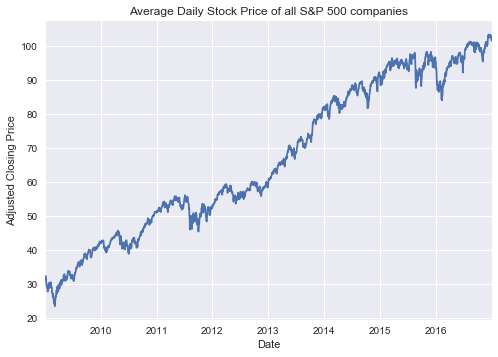

In [26]:
# Average value of all S&P 500 companies
all_companies = load_company_price_history(company_both, normalize=False)
all_companies.mean(axis=1).plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Average Daily Stock Price of all S&P 500 companies')

This code snippet performs the following actions: It loads the price history data for all the companies in the 'company_both' list, which represents those that have both transcripts and price history. The data is loaded into the 'all_companies' DataFrame. By using the mean() function, the mean value is calculated along the rows (axis=1). In order to create a line plot, the calculated average values for each date are plotted against the dates. The x-axis label is 'Date', representing the dates for which the stock prices are plotted. This code calculates the average daily stock prices of all S&P 500 companies. The y-axis label is set to 'Adjusted Closing Price,' indicating the stock price values being visualized. The plot title is 'Average Daily Stock Price of all S&P 500 companies'. By taking the mean of each company's stock price for each date, we can calculate the average daily stock price across the entire S&P 500. This average daily stock price is then visualized as a line plot, providing a snapshot of the overall trends in the stock prices of the S&P 500 companies over time.

In [27]:
google_true_prices = load_company_price_history(['GOOG'])
google_true_prices.plot()
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Google Stock Price')

2017-09-18 10:35:00,094 - DEBUG - Reading company prices for GOOG
2017-09-18 10:35:00,149 - INFO - Null values found after cleaning: False


This code snippet performs the following actions: It uses the 'load_company_price_history' function to load price history data specifically for the company with the ticker symbol 'GOOG', which represents Google. As soon as the data is loaded into the 'google_true_prices' DataFrame, a line plot is created using the 'google_true_prices' DataFrame to visualize the adjusted closing price of Google's stock over time. The x-axis label is set as 'Date', representing the dates for which the stock prices are plotted. The y-axis label is set as 'Adjusted Closing Price', representing the values of the stock prices that are being visualized. The title of the plot is 'Google Stock Price', providing a clear indication of This code loads and plots the adjusted closing prices of Google's stock, providing a visual representation of Google's historical price trends over time.

In [709]:
google_prices.plot()
plt.xlabel('Date')
plt.ylabel('Daily Log Return')
plt.title('Google Daily Log Returns')

The code snippet plots the daily log returns of Google's stock prices using the 'google_prices' DataFrame. A line plot is created to visualize the daily log returns over time. The x-axis label is set as 'Date', indicating the dates for which the log returns are plotted. The y-axis label is set as 'Daily Log Return', representing the values of the log returns being visualized. "Google Daily Log" is the title of the plot. In summary, this code plots the daily log returns of Google's stock prices, allowing for an examination of the relative changes in the stock's value throughout the day. The graph provides a visual representation of the log return trends for Google's stock over time.

In [29]:
price_samples.head(10)

GOOG      AMZN      ADBE      AAPL
2009-01-02  0.020718 -0.005534  0.004767  0.041562
2009-01-05  0.020718 -0.005534  0.004767  0.041562
2009-01-06  0.018143  0.059253  0.046048 -0.016418
2009-01-07 -0.036745 -0.020430  0.000413 -0.022063
2009-01-08  0.009837  0.016938  0.002473  0.018293
2009-01-09 -0.031584 -0.029291 -0.011594 -0.022919
2009-01-12 -0.007590 -0.066859 -0.010467 -0.021086
2009-01-13  0.005173 -0.009094 -0.072426 -0.011111
2009-01-14 -0.043413 -0.059253 -0.045831 -0.027510
2009-01-15 -0.006540  0.059058 -0.013353 -0.023238

This code snippet performs the following action:  It displays the first 10 rows of the 'price_samples' DataFrame, which provides us with an overview of the selected companies' price data. In a tabular format, the data can be viewed by calling the 'head(10)' method on the DataFrame. By examining the DataFrame's columns, values, and structure, we can gain insights into the initial portion of the price data for the A snapshot of the price data for the selected companies is presented in the first 10 rows of the 'price_samples' DataFrame.

In [30]:
cum_returns = price_samples.cumsum()
cum_returns.plot()
plt.title('Cumulative log-returns')

This code snippet performs the following actions: Calculates the cumulative sum of the log returns of the selected companies' price data stored in the 'price_samples' DataFrame. By calling 'cumsum()' on the DataFrame, the cumulative log returns are displayed in a new DataFrame named 'cum_returns'. With the 'cum_returns' DataFrame, a line plot is generated, visualizing the cumulative log returns over time. 'Cumulative log-returns' provides a clear indication of what data is being displayed. To summarize, the code calculates the cumulative log returns for the selected companies' price data and plots them Visualize the cumulative log returns over time. Based on their cumulative log returns, it allows the analysis of the overall performance and trends of the selected companies' stock prices.

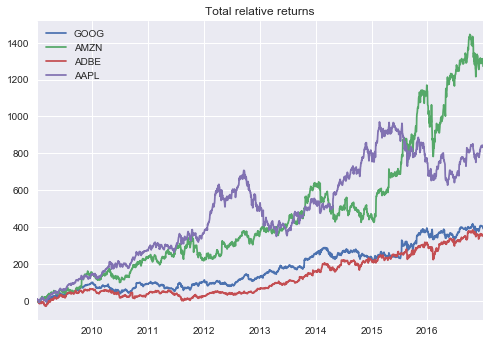

In [31]:
tot_rel_returns = 100*(np.exp(price_samples.cumsum()) - 1)
tot_rel_returns.plot()
plt.title('Total relative returns')

This code snippet performs the following actions: Calculates the total relative returns for the selected companies' price data stored in the 'price_samples' DataFrame. To do this, it first calculates the cumulative sum of the log returns using 'price_samples.cumsum()', and then applies the exponential function 'np.exp()'. The resulting values represent the total relative returns. To convert them into percentages, subtract 1 and multiply by 100. As a result, the new DataFrame named 'tot_rel_returns' is generated by multiplying 100 by (np.exp(price_samples.cumsum() - 1)). The total relative returns over time are visualized by creating a line plot using the 'tot_rel_returns' DataFrame. The plot title is 'Total relative returns', which makes clear what data is being displayed. For the selected companies' price data, this code calculates the total relative return, expresses it as percentage, and Visualizes the total relative returns over time by creating a plot. Using this method, it is possible to examine the performance and growth of selected companies' stock prices based on their total relative returns.

Comparing price data with earnings calls

In [18]:
google_price_sample = load_company_price_history(['GOOG'])['2012':'2015']
google_returns_sample = load_company_price_history(['GOOG'], normalize=True)['2012':'2015']
google_transcript_sample = load_company_transcripts('GOOG')['2012':'2015']

2017-09-19 20:26:57,937 - DEBUG - Reading company prices for GOOG
2017-09-19 20:26:57,996 - INFO - Null values found after cleaning: False
2017-09-19 20:26:57,998 - DEBUG - Reading company prices for GOOG
2017-09-19 20:26:58,050 - INFO - Null values found after cleaning: False
2017-09-19 20:26:58,052 - DEBUG - Reading company transcripts for GOOG
2017-09-19 20:26:58,093 - WARNING - 1 duplicates removed from file


A sample of price data, return data, and transcript data for the company 'GOOG' (Google) for the period 2012-2015 is loaded in this code snippet. By using the 'load_company_price_history' function, the price data for 'GOOG' is loaded, and only the data within the specified time period is extracted by using the indexing operator ['2012':'2015']. The resulting DataFrame is assigned to the variable 'google_price_sample'. To calculate the log-returns, the 'load_company_price_history' function is used with the 'normalize' flag set to True. As with the previous step, only the data within the specified time range is extracted, which is then assigned to the variable 'google_returns_sample'. In addition, only the data within the specified time range is extracted from the transcript data for 'GOOG' using the 'load_company_transcripts' function. The resulting DataFrame is assigned to the variable 'google_transcript_sample'. This code loads and extracts price data, return data, and transcript data for the company 'GOOG' between 2012 and 2015. The samples can be further analyzed or used for specific analysis tasks related to this company and time period.

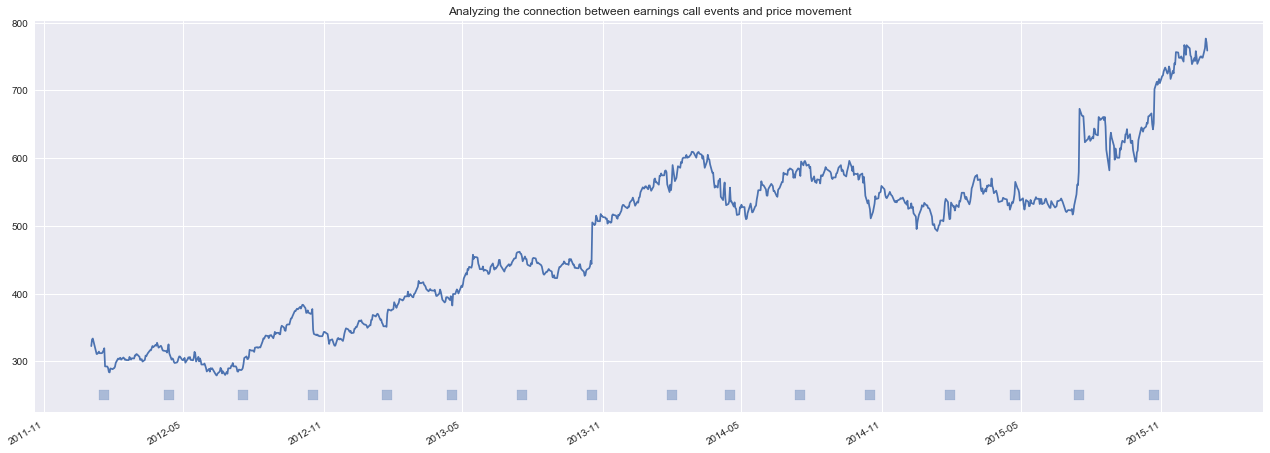

In [17]:
def plot_price_and_text(prices, transcripts):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's stock price.
    
    Args:
        prices: A Pandas DataFrame containing a company's price history. 
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    # Plot the transcript events below the price, 10% offset from min price
    event_level = int(prices.min()*0.9) 
    fig, ax = plt.subplots(figsize=(22,8))
    ax.scatter(transcripts.index, event_level*np.ones(len(transcripts.index)), marker = 's', alpha=0.4, s=100)
    ax.plot(prices.index, prices)
    fig.autofmt_xdate()
    ax.set_title('Analyzing the connection between earnings call events and price movement')
    
plot_price_and_text(google_price_sample, google_transcript_sample)

This code snippet defines a function called 'plot_price_and_text' which visualizes earnings call dates on top of a chart of the company's stock price. The function takes two arguments: 'prices', a Pandas DataFrame containing the price history of a company, and 'transcripts', a Pandas DataFrame containing the earnings call history for the same company. A function calculates the minimum price from the 'prices' DataFrame and multiplies it by 0.9. Set the level at which transcript events will be plotted below the price chart. An axis object and figure are created, specifying their size, so the transcript events can be visually distinguished from the price data. Ax scatters transcript events at the earnings calls dates by using ''marker='s'' at the event level (np.ones(len(transcripts.index)), alpha=0.4, s=100). By plotting the stock price on a line chart with 'ax.plot(prices.index, prices),' dates are used to format the x-axis labels. By using 'fig.autofmt_xdate()', the dates are properly visualized. The plot is titled 'Analyzing the relationship between earnings call events and price movement', indicating the plot's purpose. On top of the company's stock price chart, the 'plot_price_and_text' function visualizes the dates of earnings calls based on the price history and earnings call data. In this way, the potential connection between earnings call events and price movements can be analyzed and understood. In order to generate the plot for the company 'GOOG' (Google), the function is called with the 'google_price_sample' and 'google_transcript_sample' data.

Explore the relationship between text events and returns

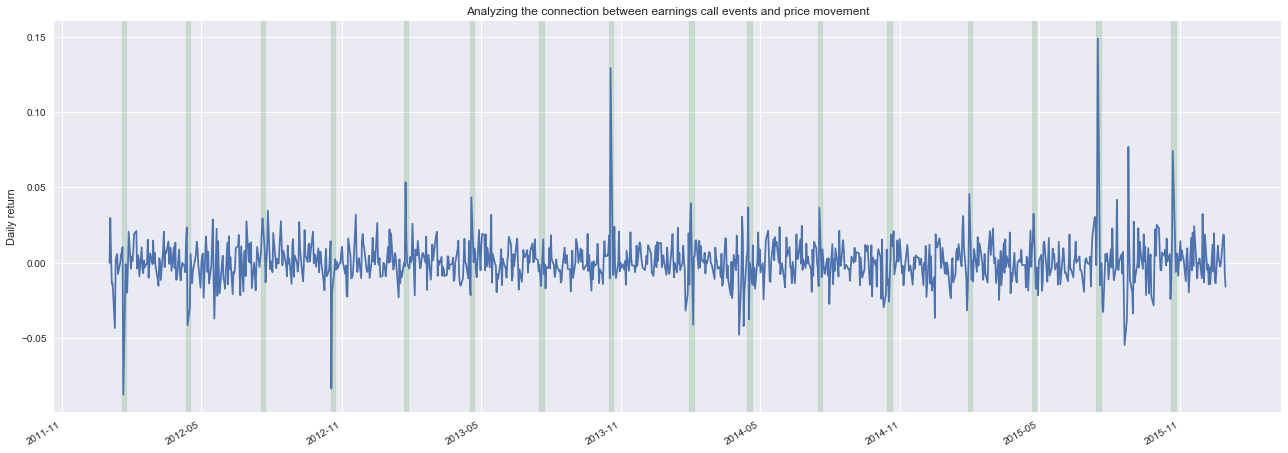

In [708]:
def plot_returns_and_text(returns, transcripts):
    '''
    Plots the dates of a company's earning calls on top of a chart of the company's daily returns.
    
    Args:
        prices: A Pandas DataFrame containing a company's price history. 
        transcripts: A Pandas DataFrame containing a company's history of earnings calls.
    '''
    # Plot the transcript events below the price, 10% offset from min price
    event_level = int(returns.min()*0.9) 
    fig, ax = plt.subplots(figsize=(22,8))
    #ax.scatter(transcripts.index, 0.1*np.ones(len(transcripts.index)), marker = 's', alpha=0.4, s=100)
    ax.plot(returns.index, returns)
    for date in transcripts.index:
        ax.axvspan(date - pd.to_timedelta('1 days'), date + pd.to_timedelta('6 days'), color='green', alpha=0.15)
    fig.autofmt_xdate()
    ax.set_title('Analyzing the connection between earnings call events and price movement')
    ax.set_ylabel('Daily return')

plot_returns_and_text(google_returns_sample, google_transcript_sample)

On top of a chart of the company's daily returns, this code snippet visualizes the dates of a company's earnings calls using a function called 'plot_returns_and_text'. There are two arguments to the function: 'returns' containing daily returns for a company, and 'transcripts' containing earnings calls history for that company. As part of the function, the minimum return value from the 'returns' DataFrame is calculated and Transcript events will be plotted below the returns chart at a level multiplied by 0.9. This helps to visually distinguish the transcript events from the returns data.

A figure is created, along with an axis. The returns are plotted as a line chart using 'ax.plot(returns.index, returns)'. The plot is shaded green for each date in the 'transcripts' index using 'ax.axvspan(date - pd.to_timedelta('1 days'), date + pd.to_timedelta('6 days'), color='green', alpha=0.15)'. With 'fig.autofmt_xdate()', the x-axis labels are formatted as dates, ensuring the dates are properly displayed. The title of the plot indicates the purpose of the visualization as 'Analyzing the connection between earnings call events and price movement'. As for the y-axis label, it is set to 'Daily return', representing the daily returns being visualized. Overall, the plot_returns_and_text function is very useful. Graphs the dates of the earnings calls on top of the daily returns chart of the company, combining daily returns with earnings call data. By doing this, the potential connection between earnings call events and corresponding price movements can be analyzed and understood. To generate the plot for the company 'GOOG' (Google), the function is called with 'google_returns_sample' and 'google_transcript_sample' data.

2017-09-22 09:03:46,754 - DEBUG - Reading company prices for CMG
2017-09-22 09:03:46,809 - INFO - Null values found after cleaning: False
2017-09-22 09:03:46,815 - DEBUG - Reading company transcripts for CMG
2017-09-22 09:03:46,907 - WARNING - 1 duplicates removed from file


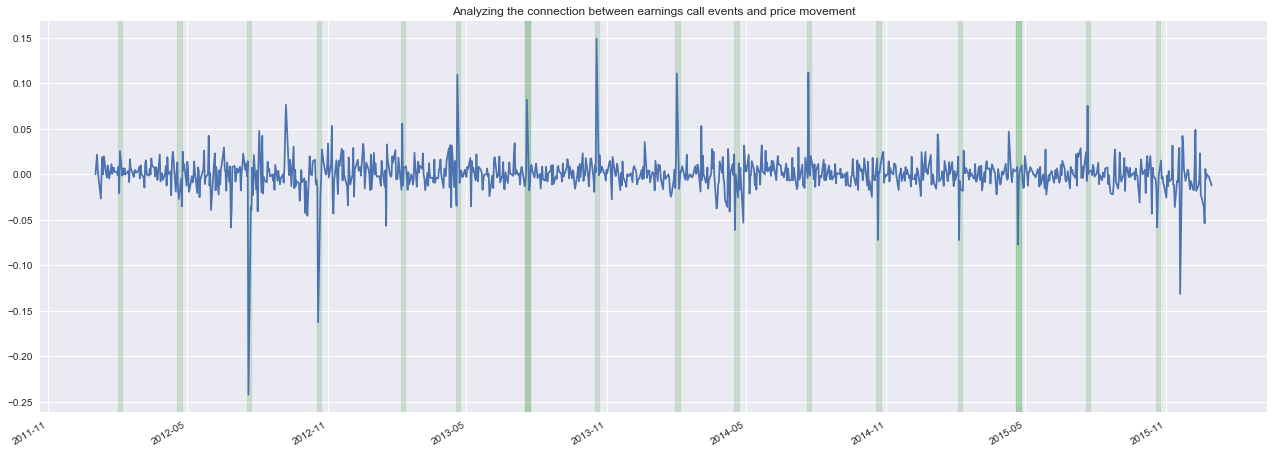

In [705]:
plot_returns_and_text(load_company_price_history(['CMG'], normalize=True)['2012':'2015'],
                      load_company_transcripts('CMG')['2012':'2015'])

To visualize earnings calls on top of a chart of daily returns for a company with the ticker symbol 'CMG' (Chipotle Mexican Grill), this code snippet uses the function 'plot_returns_and_text'. A 'load_company_price_history' function is called with the argument ['CMG'], normalize=True, and a time range of '2012' to '2015' to generate the necessary data for plotting. Calculates the daily returns based on the price history data for 'CMG' during the specified period. The resulting DataFrame containing the normalized daily returns is then passed as the first argument to the 'plot_returns_and_text' function. The 'load_company_transcripts' function retrieves the transcript data for 'CMG'. Additionally, the function is limited to the time period '2012' to '2015'. 'plot_returns_and_text' accepts the resulting DataFrame as the second argument as the transcript data for the specified period. With the provided data, the 'plot_returns_and_text' function produces a plot that displays the dates of earnings calls on top of a chart representing the daily returns of 'CMG' stock during the specified period. The code creates a visualization that combines earnings call dates with daily returns. Returns for Chipotle Mexican Grill (CMG) from 2012 to 2015. Analyzing and exploring the relationship between earnings call events and the stock's daily returns can be done with the plot.

There are several examples of large price movements around quarterly earnings calls. The purpose of this project is to develop an algorithm capable of learning the price movements associated with earnings calls.

Pretrained word embeddings will be used in this project. GloVe (Global Vectors for Word Representation) embeddings will be used specifically. By factorizing a matrix of word co-occurrence statistics, these embeddings are created. GloVe embeddings provide vector representations for 400K English words in 50, 100, 200, and 300 dimensions. The GloVe embeddings data can be downloaded, with a file size of 822MB. Facebook's FastText embeddings were also compared. Due to their large file size of 9 GB, it is not feasible to use them locally. Thus, GloVe embeddings will remain the focus.

In [10]:
with open('glove.6B/glove.6B.50d.txt') as words:
    w2v = {word.split()[0]: np.vectorize(lambda x: float(x))(word.split()[1:]) for word in words}

logging.info('{} words in word2vec dictionary.'.format(len(w2v)))

# We'll later reduce the dimensionality from 50 to 2, let's go ahead and fit the entire corpus
# I've opted to use PCA over t-SNE given that we can fit the transformer once and have deterministic results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(list(w2v.values()))
w2v_reduced = dict(zip(list(w2v.keys()), reduced_embeddings.tolist()))

2017-10-04 09:55:50,937 - INFO - 400000 words in word2vec dictionary.


This code snippet performs the following actions: It opens the file 'glove.6B/glove.6B.50d.txt', which contains the pretrained GloVe word embeddings. These embeddings represent words as vectors in a high-dimensional space. Word embeddings are stored in a dictionary called 'w2v'. Words in the embeddings file are split into their components, where the first element represents the word itself, and the remaining elements correspond to vector values. The vector values are converted to floating-point numbers and associated with the word in the 'w2v' dictionary. In the 'logging.info()' function, the number of words in the 'w2v' dictionary is logged. This helps in understanding the extent of the word embeddings available in the GloVe dataset. After that, the code prepares the word embeddings for dimensionality reduction. For visualization purposes, we want to reduce the dimensionality from 50 to 2. PCA (Principal Component Analysis) is chosen for this task. An instance of the 'PCA' class is created with the parameter 'n_components' set to 2, indicating that the resulting vectors will have two dimensions. This is accomplished using the 'fit_transform()' method of the 'PCA' object. In this process, the high-dimensional word vectors are reduced to two-dimensional vectors through dimensionality reduction. The resulting reduced embeddings are stored in the 'reduced_embeddings' variable. A new dictionary named 'w2v_reduced' is created to facilitate mapping between words and their reduced embeddings. Using the 'w2v' dictionary as a key, the corresponding reduced embedding vectors are converted to lists and associated with the words in 'w2v_reduced'. In summary, this code loads the pretrained GloVe word embeddings, converts them to a word-to-vector dictionary ('w2v'), and logs the number of words in the dictionary. To obtain reduced embeddings in two dimensions, PCA is used for dimensionality reduction. In the end, the reduced embeddings are stored in a new dictionary ('w2v_reduced') for later use.

We have created a dictionary that maps words in our vocabulary to vector representations. The keys in the dictionary represent the words, and the values are the vectors that capture the semantic meaning of each word. The vector representation of a word can be accessed by querying the dictionary with the word as the key. This allows us to retrieve the 50-dimensional vector representation associated with that word. The 50-dimensional vectors have also been projected into a 2-dimensional space. Word embeddings can be visualized more easily using this transformation. A 2D graph can be drawn by reducing the dimensions from 50 to 2, which provides a more intuitive and compact representation of semantic relationships.

In [11]:
w2v['example']

array([ 0.51564  ,  0.56912  , -0.19759  ,  0.0080456,  0.41697  ,
        0.59502  , -0.053312 , -0.83222  , -0.21715  ,  0.31045  ,
        0.09352  ,  0.35323  ,  0.28151  , -0.35308  ,  0.23496  ,
        0.04429  ,  0.017109 ,  0.0063749, -0.01662  , -0.69576  ,
        0.019819 , -0.52746  , -0.14011  ,  0.21962  ,  0.13692  ,
       -1.2683   , -0.89416  , -0.1831   ,  0.23343  , -0.058254 ,
        3.2481   , -0.48794  , -0.01207  , -0.81645  ,  0.21182  ,
       -0.17837  , -0.02874  ,  0.099358 , -0.14944  ,  0.2601   ,
        0.18919  ,  0.15022  ,  0.18278  ,  0.50052  , -0.025532 ,
        0.24671  ,  0.10596  ,  0.13612  ,  0.0090427,  0.39962  ])

From the dictionary 'w2v', this code snippet retrieves the vector representation of the word 'example'. 

'w2v' represents a dictionary where the keys are words in our vocabulary, and the values are their corresponding vector representations. 

We can access the vector representation associated with the word 'example' by using 'w2v['example']'. By doing so, we can retrieve the specific vector that represents the semantic meaning or contextual information of the word 'example' as represented by the pretrained word embeddings. 

Vector representations provide numerical representations of a word's characteristics, making them useful for similarity comparisons, semantic analysis, and language modeling.

In [12]:
w2v_reduced['example']

[4.092878121172412, 1.785939893037579]

The code snippet retrieves the reduced vector representation of the word 'example' from the dictionary 'w2v_reduced'. 

We can use the variable 'w2v_reduced' to represent a dictionary whose keys are words in our vocabulary and whose values are reduced vector representations of those words. These reduced embeddings were obtained by applying dimensionality reduction techniques, such as PCA, to the original word embeddings. The reduced vector representation associated with the word 'example' is accessible using 'w2v_reduced['example']'. This reduced vector captures the semantic meaning or contextual information of the word 'example' in a lower-dimensional space, typically 2-dimensional in this case. This allows the word embeddings to be visualized and analyzed more easily. Despite preserving important semantic relationships and similarities between words, it represents the original high-dimensional word embeddings in a compressed manner. A reduced representation of the word embeddings can be useful for tasks like visualization on a 2D graph, clustering, and other analyses.

In [14]:
# Sample transcripts from collection
sample_text_google = google_transcripts['body'][5]
sample_text_amazon = amazon_transcripts['body'][5]
sample_text_adobe = adobe_transcripts['body'][5]

This code snippet selects a sample of text from the transcripts of different companies. 'sample_text_google' contains a sample of text taken from Google's transcript. As indicated by the 'body' column in the Google transcript DataFrame, it represents a specific portion of the transcript. Similarly, 'sample_text_amazon' contains a sample of text taken from the body of the transcript for Amazon, specifically from the 5th entry in the 'body' column of the Amazon transcripts DataFrame. This sample also contains an excerpt from Adobe's transcript, which represents the 5th entry in the 'body' column. Adobe transcripts DataFrame.  These samples of text can be used for further analysis, processing, or for any other relevant tasks that involve working with specific portions of the transcripts.

Let's see which words were ignored when we converted the transcripts to word embeddings.

In [15]:
from keras.preprocessing.text import text_to_word_sequence

not_in_vocab = set([word for word in text_to_word_sequence(sample_text_google) if word not in w2v])
print('  --  '.join(not_in_vocab))

motofone  --  segment's  --  we're  --  ml910  --  here's  --  we've  --  doesn't  --  didn't  --  ed's  --  z6  --  asp's  --  vhub  --  p2k  --  weren't  --  you're  --  3gq  --  i'll  --  ray's  --  wasn't  --  they're  --  what's  --  i'd  --  motowi4  --  world's  --  embracement  --  downish  --  broadbus  --  hereon  --  devices'  --  shippable  --  w355  --  motorola's  --  w205  --  that’s  --  isn't  --  morning's  --  mw810  --  wimax's  --  that's  --  wouldn't  --  ounjian  --  let's  --  w215  --  dan's  --  motoming  --  organization's  --  krzr  --  reprioritizing  --  w510  --  mc50  --  greg's  --  today's  --  mc70  --  terry's  --  we'll  --  company's  --  don't  --  5ish  --  haven't  --  kvaal  --  you've  --  you'll  --  can't  --  nottenburg  --  motorokr  --  what’s  --  mc35  --  i've  --  metlitsky  --  there's  --  july's  --  w370  --  i'm  --  it's  --  motorizr


This code snippet performs the following actions: It imports the Keras function 'text_to_word_sequence'. The function tokenizes a given text into a sequence of words. 

A sample of text from Google transcripts is represented by the 'sample_text_google' variable. Input for the 'text_to_word_sequence' function is this text. The 'text_to_word_sequence' function splits the sample text into individual words, removes punctuation, and converts everything to lowercase. A sequence of words is then processed further in order to identify words that are not in the 'w2v' dictionary. In order to determine if these words are part of the pretrained word embeddings vocabulary, the words are checked against the 'w2v' dictionary. Words from the sequence that are not found in 'w2v' are added to the 'not_in_vocab' set. These words are those from the sample text that are not in the pretrained vocabulary of word embeddings. The code then prints the words in the 'not_in_vocab' set, separated by ' -- '. The pretrained word embeddings vocabulary does not include the words from the sample text.

Conjunctions are not supported in our word embedding dictionary. However, this should be alright seeing as most of them would likely be considered stopwords anyways. Stopwords are words that are commonly used and do not convey a unique signature about the text. When it comes to identifying text based on the frequency of words used, they're useless.

Weighting of TF-IDF

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def get_tfidf_values(documents, norm=None):
    ''' 
    Transforms a collection of text documents into a collection of dictionaries mapping words to TFIDF values.
    
    Args:
        documents: An iterable which yields either str, unicode or file objects.
        norm: ‘l1’, ‘l2’ or None. Norm used to normalize term vectors. None for no normalization.
        
    Returns:
        A list of dictionaries containing mappings from words to TF-IDF scores for each document.
    '''
    count_vec = CountVectorizer()
    counts = count_vec.fit_transform(documents)
    words = np.array(count_vec.get_feature_names())
    
    transformer = TfidfTransformer(norm=norm)
    tfidf = transformer.fit_transform(counts)
    tfidf_arr = tfidf.toarray()
    
    tfidf_documents = []
    for i in range(len(documents)):
        tfidf_doc = {}
        for word, tfidf in zip(words[np.nonzero(tfidf_arr[i, :])], tfidf_arr[i, :][np.nonzero(tfidf_arr[i, :])]):
            tfidf_doc[word] = tfidf
        tfidf_documents.append(tfidf_doc)
    return tfidf_documents

In this code snippet, 'get_tfidf_values' is used to transform a collection of text documents into dictionaries. These dictionaries map words to their corresponding TF-IDF (Term Frequency-Inverse Document Frequency) values. Two arguments are required: 'documents' and 'norm'. 'documents' is an iterable object that contains the transformed text documents, and 'norm' specifies the normalization method for the term vectors. It can be set to 'l1', 'l2', or 'None' for no normalization. The function uses the 'CountVectorizer' class from scikit-learn to convert the text documents into token counts. The 'fit_transform' method of 'CountVectorizer' is applied to the 'documents', producing the counts matrix. Vocabulary words are retrieved using the 'get_feature_names' method. These words are stored in a numpy array named 'words'. The TF-IDF values are calculated using the 'TfidfTransformer' class. This matrix is converted to a numpy array using the 'toarray' method of 'TfidfTransformer' by applying the 'fit_transform' method to the counts matrix. The 'tfidf_arr' variable is then used to store the TF-IDF matrix. In order to create the final output, the list 'tfidf_documents' is initialized. A dictionary named 'tfidf_doc' is created for each document as it iterates over the range of document indices. The dictionary maps words (obtained from 'words') to their respective TF-IDF scores (obtained from 'tfidf_arr'). In 'tfidf_arr', non-zero elements are paired with corresponding words, and these pairs are added to 'tfidf_doc'. Finally, 'tfidf_doc' is appended to the 'tfidf_documents' list. This list contains the TF-IDF values for each document in the input collection.

In [17]:
def docs_to_3D(tfidf_documents, w2v_reduced):
    '''
    Transforms a list of dictionaries (word:tf-idf score) into a list of Pandas DataFrames containing
    word embedding dimensions (2) and TF-IDF score. 
    
    Args:
        tfidf_documents: A list of dictionaries containing mappings from words to TF-IDF scores for each document.
        w2v_reduced: A dictionary mapping words to their 2D embedding. 
        
    Returns:
        A list of DataFrames where each DataFrame contains the vocabulary and its features of a transcript.
    '''
    text_docs_3D = []
    
    for i, doc in enumerate(tfidf_documents): # list of documents with word:tfidf
        data = []
        for k, v in tfidf_documents[i].items():
            try:
                item = w2v_reduced[k][:] # Copy values from reduced embedding dictionary
                item.append(v) # Append the TFIDF score
                item.append(k) # Append the word
                data.append(item) # Add [dim1, dim2, tfidf, word] to collection
            except: # If word not in embeddings dictionary
                continue 

        df = pd.DataFrame(data, columns=['dim1', 'dim2', 'tfidf', 'word'])
        df = df.set_index(['word'])

        text_docs_3D.append(df)
        
    return text_docs_3D

The following code snippet provides a function called 'docs_to_3D' that converts a list of dictionaries (word: TF-IDF score) into a list of Pandas DataFrames. Each DataFrame represents the word embedding dimensions (2D) along with the corresponding TF-IDF score for each word. This function takes two arguments: 'tfidf_documents' and 'w2v_reduced'. TFIDF_documents is a list of dictionaries that contain mappings between words and their TF-IDF scores. Words are mapped into their 2D embedding representations by 'w2v_reduced', a dictionary. Within the function, an empty list named 'text_docs_3D' is initialized to store the resulting DataFrames. Using the 'enumerate' function, the function iterates over each document in 'tfidf_documents'. For each document, it creates an empty list called 'data' to store the transformed data.

From the 'w2v_reduced' dictionary, the function attempts to retrieve the 2D embedding representation of each word (key) and its TF-IDF score (value) in the current document. The function creates a list 'item' that contains the two dimensions of the reduced embedding, the TF-IDF score, and the word. If the word does not appear in the 'w2v_reduced' dictionary, the function moves on to the next word in the 'data' list.

Once all words in the document have been processed, the 'data' list is used to create a Pandas DataFrame named 'df' with columns 'dim1', 'dim2', 'tfidf', and 'word'. The 'word' column is set as the index of the DataFrame. It represents the embedding dimensions (2D) and the TF-IDF scores for the words in the document. And finally, the 'df' DataFrame is added to the 'text_docs_3D' list. This process is repeated for each document in 'tfidf_documents'. Each document is represented by a DataFrame in 'text_docs_3D'. Word embedding dimensions (2D) and TF-IDF scores are represented by each DataFrame.

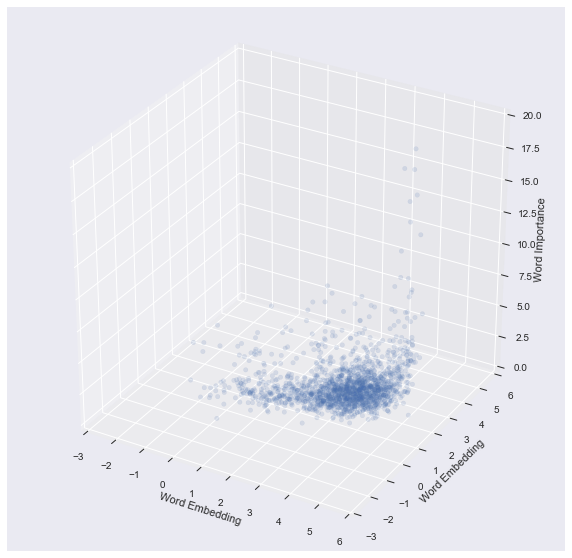

In [18]:
from mpl_toolkits.mplot3d import Axes3D

tfidf_docs = get_tfidf_values(google_transcripts['body'])
text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 6])
ax.set_ylim([-3, 6])
ax.set_zlim([0, 20])
ax.set_xlabel('Word Embedding')
ax.set_ylabel('Word Embedding')
ax.set_zlabel('Word Importance')

text = text_docs_3D[0]
scatter = ax.scatter(text['dim1'], text['dim2'], text['tfidf'].apply(np.sqrt), alpha=0.15,
                     zdir='z', s=20, c=None, depthshade=True)

To visualize the relationship between word embeddings, word embeddings, and word importance for a particular document, this code snippet generates a 3D scatter plot. The TF-IDF values for the text documents are obtained by calling the function 'get_tfidf_values' with the input 'google_transcripts['body']'. The resulting TF-IDF values are stored in the 'tfidf_docs' variable. Pandas DataFrames are created using the 'docs_to_3D' function and the 'w2v_reduced' parameter. The resulting DataFrames, representing the 3D coordinates of word embeddings along with the corresponding TF-IDF scores, are stored in the 'text_docs_3D' variable. The figure object 'fig' is then created. The Axes3D object 'ax' is added to the figure as a subplot with the projection set to '3d'. Plot x, y, and z limits are set using the 'set_xlim', 'set_ylim', and 'set_zlim' methods. Labels for the x, y, and z axes are set using the 'set_xlabel', 'set_ylabel', and 'set_zlabel' methods. Each document is represented by a DataFrame in the 'text_docs_3D' list. In this code snippet, the first DataFrame from the list, denoted as 'text', is selected for plotting. A scatter plot is created using the scatter method. As x, y, and z coordinates, the 'dim1', 'dim2', and 'tfidf' columns of the 'text' DataFrame are used. For a better visual representation, 'tfidf' values are square-rooted. The 'alpha' parameter controls the transparency of the markers, the 'zdir' parameter determines the direction of their depth shading, the 's' parameter determines the size of the markers, and the 'c' parameter specifies their color. This indicates that the markers will not have a specific color since the 'c' parameter is set to 'None'.

Overall, the code generates a 3D scatter plot with the word embeddings plotted in the x and y dimensions, the word importance (TF-IDF scores) represented by the marker size, and the depth shading indicating the marker's position in the z dimension.

(array([ 911.,  679.,   88.,   15.,   12.,    3.,    2.,    1.,    2.,    2.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.]),
 <a list of 10 Patch objects>)

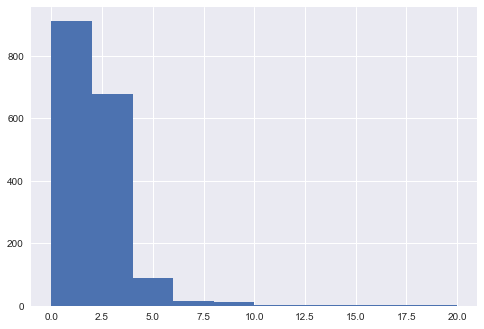

In [113]:
plt.hist(text_docs_3D[0]['tfidf'].apply(np.sqrt), range=(0,20))

This code generates a histogram to visualize the distribution of TF-IDF scores for a specific document in the 'text_docs_3D' list.

'text_docs_3D[0]' selects the first DataFrame, representing the word embeddings and TF-IDF scores of a particular document. With the 'tfidf' column of the selected DataFrame as an input, the 'hist' function from the 'plt' module is called. Prior to plotting the histogram, 'apply(np.sqrt)' is used to apply the square root function to each value in the 'tfidf' column. The 'range' parameter is set to (0, 20), indicating that the histogram will span the range of TF-IDF scores from 0 to 20. The code generates a histogram that displays TF-IDF scores for the selected document. In the histogram, the x-axis represents the TF-IDF score range, and the y-axis represents the frequency or count of TF-IDF scores within each bin.

Evolution of company transcripts over time. Enhancement: instead of supplying a list of word embedding vectors, pass a dictionary of word:vector pairs so that the user can hover over points and see what words they refer to.

In [19]:
from matplotlib import rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

This code snippet sets a configuration option in matplotlib to enable HTML5 rendering for animations. The 'rc' function in the matplotlib library is used to modify the configuration. A configuration option's category is specified by its first argument, 'animation'. Within the 'animation' category, the second argument 'html' specifies the specific subcategory to be modified. The value 'html5' is assigned to this subcategory. When 'html' is set to 'html5', the resulting animation will be rendered as HTML5. This allows the animation to be embedded and played directly in a web browser. By modifying this configuration option, all subsequent animations created with matplotlib will be compatible with HTML5.

In [20]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def animate_company_transcripts_3D(vis_docs):
    '''Accepts a reduced (2D) vector representation of a collection of
    text documents with TDIDF scores and animates the visual evolution of text over time.
    
    Optional: include date labels in plot.
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-3, 6])
    ax.set_ylim([-3, 6])
    ax.set_zlim([0, 20])
    ax.set_xlabel('Word Embedding')
    ax.set_ylabel('Word Embedding')
    ax.set_zlabel('Word Importance')

    text = vis_docs[0]
    scatter = ax.scatter(text['dim1'], text['dim2'], text['tfidf'], alpha=0.1, 
                         zdir='z', s=20, c=None, depthshade=True, animated=True)

    def update(frame_number):
        text = vis_docs[frame_number]
        scatter._offsets3d = (text['dim1'], text['dim2'], text['tfidf'].apply(np.sqrt))
        return scatter

    return FuncAnimation(fig, update, frames=len(vis_docs), interval=300, repeat=True)

Animate_company_transcripts_3D takes as input a reduced (2D) vector representation of a collection of text documents with TF-IDF scores. The function generates an animation that visualizes the evolution of text over time. A figure object 'fig' and a subplot with 3D projection 'ax' are generated. 'set_xlim', 'set_ylim', and 'set_zlim' are used to set the x, y, and z limits of the plot, respectively. Labels for the x, y, and z axes are set using the 'set_xlabel', 'set_ylabel', and 'set_zlabel' methods. For initial plotting, we select 'text' from the 'vis_docs' list. Using the scatter method of the 'ax' object, a scatter plot is created. In the 'text' DataFrame, the 'dim1', 'dim2', and 'tfidf' columns are used as the x, y, and z coordinates. To provide a better visual representation, the 'tfidf' values are applied with the square root function. 'alpha' specifies the transparency of the markers, 'zdir' specifies the direction of the depth shading, 's' specifies the size of the markers, and 'c' specifies the color. In this case, the 'c' parameter is set to 'None', indicating that the markers will not have a specific color. 'animate_company_transcripts_3D' updates the scatter plot every frame. This function takes a 'frame_number' as input, which represents the current frame. In 'update', the 'text' DataFrame corresponding to the current frame is selected, and the scatter plot is updated based on the 'dim1', 'dim2', and 'tfidf' columns. To create the animation, the 'FuncAnimation' class is used from the 'matplotlib.animation' module. This function takes as inputs the 'fig', 'update' function, the number of frames in 'vis_docs', the interval between frames in milliseconds, and the 'repeat' parameter. A resulting animation is returned by the function. It is possible to create an animated visualization of text evolution over time using the 'animate_company_transcripts_3D' function, where each frame shows the position and size of text markers based on the values 'dim1', 'dim2', and 'tfidf'.

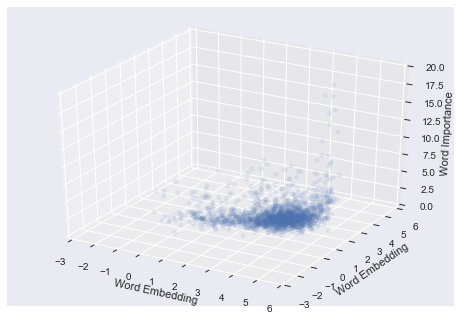

In [21]:
tfidf_docs = get_tfidf_values(google_transcripts['body'])
text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)
animate_company_transcripts_3D(text_docs_3D)

A series of steps is performed by this code snippet. The first step is to calculate the TF-IDF (Term Frequency-Inverse Document Frequency) values for the documents in the 'google_transcripts' dataset by calling the 'get_tfidf_values' function. TF-IDF represents the importance of each word in the documents relative to the entire corpus. A 'docs_to_3D' function is then invoked with the TF-IDF values and the reduced word embeddings ('w2v_reduced'). In this function, TF-IDF values are transformed into Pandas DataFrames containing word embedding dimensions (2D) and the TF-IDF scores. The transformed dataframes ('text_docs_3D') are then passed to the function 'animate_company_transcripts_3D'. Using this function, you can visualize the evolution of text over time through an animated visualization. The animation plots the text markers in a 3D space, where the x and y coordinates represent the reduced word embeddings, and the marker size represents the TF-IDF score. Throughout the animation, the text markers move and change size, providing a dynamic representation of the text's characteristics and variations.

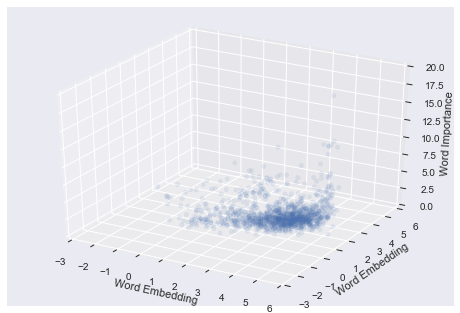

In [22]:
tfidf_docs = get_tfidf_values(apple_transcripts['body'])
text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)
animate_company_transcripts_3D(text_docs_3D)

A series of steps is performed by this code snippet. For the documents in the 'apple_transcripts' dataset, TF-IDF (Term Frequency-Inverse Document Frequency) values are first calculated. TF-IDF represents the importance of each word in the documents as a whole. These TF-IDF values are computed using the 'get_tfidf_values' function. They are then passed to the 'docs_to_3D' function along with the reduced word embeddings ('w2v_reduced'). TF-IDF values and word embeddings are transformed into Pandas DataFrames using this function. The resulting DataFrames organize the data in a format suitable for visualization, with the word embedding dimensions (2D) and the corresponding TF-IDF scores. The transformed DataFrames are then passed to the 'animate_company_transcripts_3D' function. An animated visualization shows the evolution of text over time using this function. A 3D plot displays the animation, with the x and y coordinates representing the reduced word embeddings, and the markers representing the TF-IDF scores. Throughout the animation, the markers representing the text data move and change in size, providing a dynamic and visual representation of the text's characteristics and variations.

Digitize ConvNet input space

In [502]:
def digitize_embedding_space(text_docs_3D, index, bins=250):
    '''
    Accepts a list of DataFrames where each DataFrame contains the vocabulary and its features of a transcript,
    binning each DataFrame vocabulary into a 2D array, where the bin values correspond with the sum of TF-IDF
    weights for all words assigned to the bin. 
    
    Args:
        text_docs_3D: A list of DataFrames where each DataFrame contains the vocabulary and its features of a 
        transcript.
        index: The index of the original transcripts DataFrame where index values correspond with the dates
        of the earnings call. These dates are important to preserve. 
        bins: Defines the dimensions of the 2D array used as input into the ConvNet feature extractor. 
        
    Returns:
        text_docs: A list of 2D arrays, ready for input. 
        lookup: A Pandas Series mapping the `text_docs` list indicies to their corresponding dates. 
    '''
    
    binned_docs = []
    for frame, data in enumerate(text_docs_3D):
        doc = text_docs_3D[frame]

        # Sort collection of word embeddings in continous vector space to a 2D array of bins. Take square root of 
        # TF-IDF score as a means of scaling values to prevent a small number of terms from being too dominant.
        hist = np.histogram2d(doc['dim1'], doc['dim2'], weights=doc['tfidf'].apply(np.sqrt), bins=bins)[0]
        binned_docs.append(hist)

    # Technically, you shouldn't store numpy arrays as a Series
    # Somehow, I was able to hack my way around that, but when you try to reindex the Series it throws an error
    # It was convenient to use the Series groupby function, though
    # NOTE: This should be revisited at some point using xarray or some other more suitable data store
    text_3D = pd.Series(binned_docs, index=index)

    # Combine same-day events
    if text_3D.index.duplicated().sum() > 0:
        logging.info('{} same-day events combined.'.format(text_3D.index.duplicated().sum()))
    text_3D = text_3D.groupby(text_3D.index).apply(np.mean)
    
    # Now I'll convert the Series of numpy 2d arrays into a list of numpy 2d array (losing the date index)
    # and create another Series that ties the date to the list index of text_docs 
    text_docs = text_3D.values.tolist()
    lookup = pd.Series(range(len(text_docs)), index = text_3D.index)
    
    return text_docs, lookup

Several steps are performed by the function digitize_embedding_space. Each DataFrame represents the vocabulary and features of a transcript. The function aims to convert this data into a format suitable for input into a Convolutional Neural Network (ConvNet) feature extractor. The function first iterates over the list of DataFrames and processes each one individually. Each DataFrame is binned into a two-dimensional array (2D). A bin value in the array represents the sum of the TF-IDF weights for all words in that bin. This binning process involves sorting the word embeddings in a continuous vector space and using the `np.histogram2d` function to compute the 2D histogram. Binned histograms are then collected in a new list called `binned_docs`. Each item in this list represents a transcript's vocabulary binned into a 2D array. The binned histograms are mapped to the original transcript date. Transcript dates are mapped to binned histograms in this Series. The mean of the binned histograms corresponding to duplicate dates in the index, which indicate multiple events on the same day, is used to combine them. The function converts the series of numpy 2D arrays into a list of numpy 2D arrays for input into the ConvNet. The original date index is lost in this conversion, so a new Pandas Series called `lookup` is created to map the transcript dates to the indices of the `text_docs` list.

Finally, the function returns `text_docs` and `lookup`, which contain the binned transcript data ready for input into a ConvNet and the mapping of transcript dates to their corresponding data indices, respectively.

Develop a pipeline for full text processing

In [483]:
def process_text_for_input(documents, w2v_reduced, norm=None):
    '''
    Full text preprocessing pipeline to convert DataFrames of text into input for the ConvNet.
    
    Args:
        documents: An iterable which yields either str, unicode or file objects.
        w2v_reduced: A dictionary mapping words to their 2D embedding.
        norm: ‘l1’, ‘l2’ or None. Norm used to normalize term vectors. None for no normalization.
        
    Returns:
        text_docs: A list of 2D arrays, ready for input. 
        lookup: A Pandas Series mapping the `text_docs` list indicies to their corresponding dates. 
    '''
    index = documents.index
    tfidf_docs = get_tfidf_values(documents, norm=norm)
    text_docs_3D = docs_to_3D(tfidf_docs, w2v_reduced)
    text_docs, lookup = digitize_embedding_space(text_docs_3D, index)
    return text_docs, lookup

The function `process_text_for_input` is a full text preprocessing pipeline that takes a collection of text documents and converts them into input suitable for a Convolutional Neural Network (ConvNet).

The function expects a DataFrame or similar data structure containing the text documents to be processed. It also requires a dictionary `w2v_reduced` that maps words to their 2D embeddings, and an optional parameter `norm` that specifies the normalization to be applied to the term vectors.

The function performs the following steps:

1. It extracts the index from the input documents, which represents each document's dates or timestamps. Calculating the TF-IDF values for the text documents is performed by the "get_tfidf_values" function. The raw text is converted into a collection of dictionaries that map words to TF-IDF scores. It calls the `docs_to_3D` function to transform the TF-IDF dictionaries into a list of Pandas DataFrames. DataFrames represent vocabulary and features of transcripts, including 2D embeddings and TF-IDF scores. Various DataFrames are further processed by the "digitize_embedding_space" function to create 2D arrays. The arrays represent transcript vocabulary binned into a 2D space, where the bin values represent the sum of TF-IDF weights. Lastly, the function returns a list of processed 2D arrays that are ready for input into a ConvNet, as well as a Pandas Series that maps the indices of the text_docs list to their corresponding dates or timestamps in the original documents.

In [25]:
# Test out pre-processing pipeline
text_docs, lookup = process_text_for_input(google_transcripts['body'], w2v_reduced)

2017-09-19 17:28:52,774 - INFO - 2 same-day events combined.


By applying the pre-processing pipeline to the text body of Google transcripts, the code tests the pipeline. 

By passing in the transcript's body text and w2v_reduced dictionary containing embedded words as input documents, it calls the process_text_for_input function. 

This function performs the entire text preprocessing pipeline, including computing TF-IDF values, converting them to 2D arrays, and digitizing embedding spaces. 

It contains a list of 2D arrays representing the processed text ready for input in the text_docs variable. This Pandas Series maps the indices of the `text_docs` list to their corresponding dates or timestamps in the original Google transcripts.

 Model for benchmarking ARIMA


Analyzing the data's statistical properties

In [620]:
# Note: this cell was copied from source as cited. 

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.graphics.api import qqplot

def tsplot(y, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    Original source: https://tomaugspurger.github.io/modern-7-timeseries.html
    '''
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0, lags) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

Code snippet introduces tsplot, a function that uses the statistical model library to analyze and visualize time series data. It creates a 2x2 grid of subplots to display various aspects of the time series.

The first subplot, `ts_ax`, presents the actual time series data (`y`) over time. This plot provides a visual representation of the underlying patterns and trends in the data. Histograms of the time series values are shown in the second plot. It gives an overview of the distribution and frequency of different values in the series. The autocorrelation function (ACF) plot is shown in the third subplot. ACF measures the correlation between a time series and its lagged values. This plot helps identify any significant lags in the data and provides insights into the nature of the correlation. PAF plots are shown in the fourth subplot. While accounting for intermediate lags, the PACF measures the correlation between the time series and its lagged values. It helps in identifying the direct relationships between the current observation and its historical values. By specifying the lags parameter in the tsplot function, you can include how many lags you want in the ACF and PACF plots. Correlation analyses consider a range of lagged values based on this parameter. This function provides valuable insights into the characteristics and potential modeling approaches for time series data by visualizing the time series, its distribution, as well as autocorrelation and partial autocorrelation patterns.

In [63]:
# Load a few companies for inspection
company_price_ARIMA = load_company_price_history(['GOOG', 'AAPL', 'AMZN', 'CA', 'MMM'])

# Select a company and sample a two year time period, reindexing to have a uniform frequency
google_price_ARIMA = company_price_ARIMA['GOOG']['2012':'2013']

apple_price_ARIMA = company_price_ARIMA['AAPL']['2012':'2013']

logging.info("Index frequency: {}".format(google_price_ARIMA.index.freq))

2017-09-18 14:08:07,752 - DEBUG - Reading company prices for GOOG
2017-09-18 14:08:07,759 - DEBUG - Reading company prices for AAPL
2017-09-18 14:08:07,763 - DEBUG - Reading company prices for AMZN
2017-09-18 14:08:07,766 - DEBUG - Reading company prices for CA
2017-09-18 14:08:07,769 - DEBUG - Reading company prices for MMM
2017-09-18 14:08:07,831 - INFO - Null values found after cleaning: False
2017-09-18 14:08:07,834 - INFO - Index frequency: <BusinessDay>


Using the function 'load_company_price_history', the code loads the price history of several companies. We will inspect 'GOOG', 'AAPL', 'AMZN', 'CA', and 'MMM'. The resulting data is stored in the `company_price_ARIMA` variable. The code then selects the price history of Google from 2012 to 2013. In a similar manner, it selects the price history for the company 'AAPL' for the same period of time. These subsets of data are stored in the variables `google_price_ARIMA` and `apple_price_ARIMA`, respectively. When the code runs, a message is logged indicating the frequency of the index in the Google Price Index. Data points are recorded or observed at a given frequency or time interval, which is referred to as the index frequency. Time series analysis and modeling can benefit from frequency information.

(<matplotlib.axes._subplots.AxesSubplot at 0x115003198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117d4fa90>)

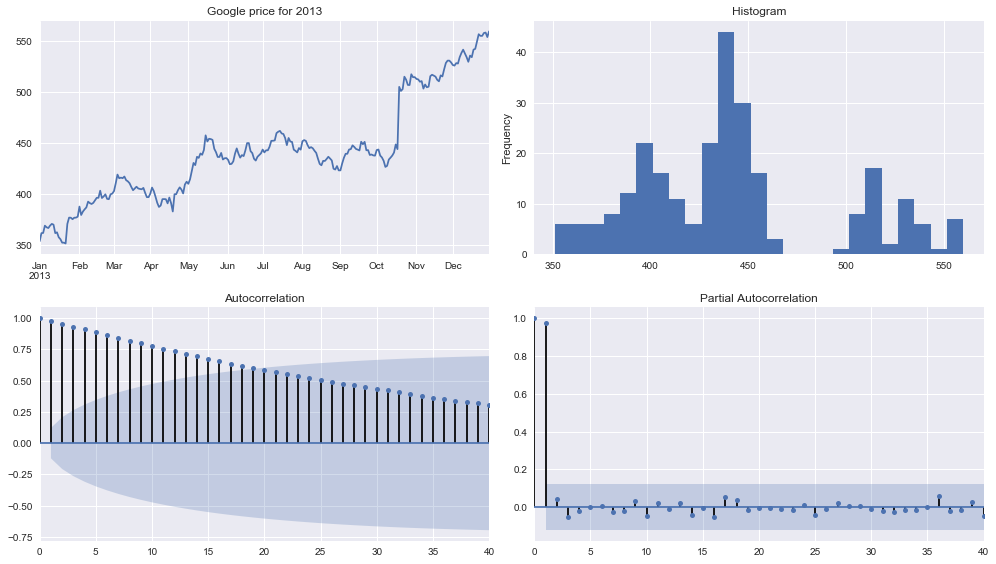

In [69]:
tsplot(google_price_ARIMA['2013'], title='Google price for 2013', lags =40)

In 2013, the code generates a time series plot and various diagnostic plots for Google stock price data. It uses the `tsplot` function to create the plots. Throughout 2013, it shows the trend and pattern of the Google stock price. It provides a visual representation of how the price fluctuated over time. In 2013, the histogram plot shows the distribution of stock price values. It helps in understanding the frequency of different price levels and the shape of the distribution. ACF plots show the correlation between the stock price at different lags. It helps identify any significant patterns or dependencies in the price series. The partial autocorrelation function (PACF) plot also examines the correlation between the stock price at different lags, but removes the indirect correlations. It helps identify the direct relationship between the price at a given lag and the price at the current time. These plots can provide insights into the characteristics of the Google stock price series in 2013, including trends, seasonality, autocorrelation, and potential lagged effects. Time series analysis and forecasting benefit from these insights.

(<matplotlib.axes._subplots.AxesSubplot at 0x10f4f7c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11094fcc0>)

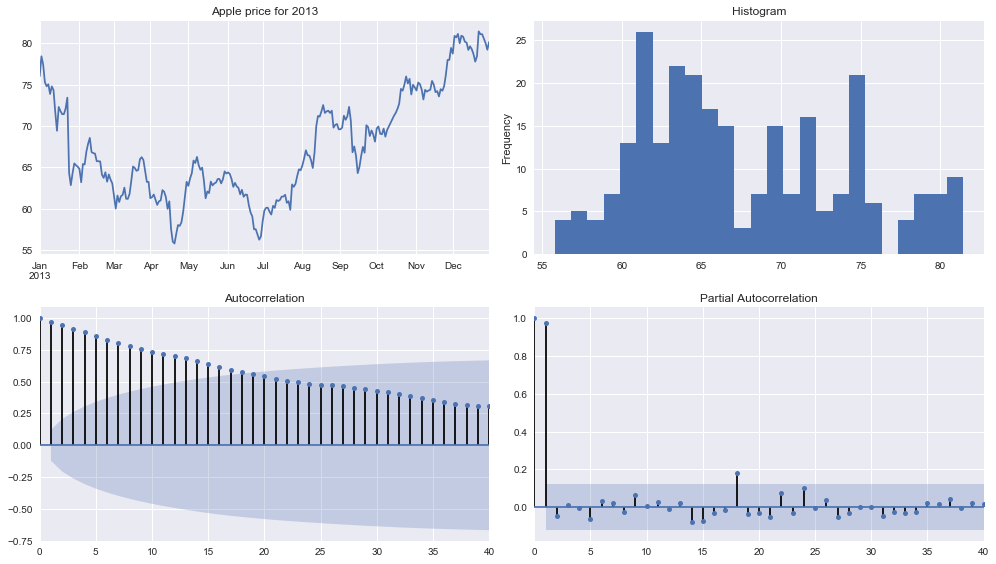

In [70]:
tsplot(apple_price_ARIMA['2013'], title='Apple price for 2013', lags = 40)

For Apple stock prices in 2013, the code generates a time series plot and various diagnostic plots. It uses the `tsplot` function to create the plots. A time series plot shows the Apple stock price over the course of 2013. It provides a visual representation of how the price fluctuated over time. It shows the distribution of stock price values in 2013. It helps in understanding the frequency of different price levels and the shape of the distribution. It shows the correlation between stock prices at different latencies. It helps identify any significant patterns or dependencies in the price series. A partial autocorrelation function (PACF) plot also examines correlation between stock prices at different lags, but eliminates indirect correlation through intermediate lags. It helps identify the direct relationship between the price at a given lag and the current price.

These plots can provide insight into the characteristics of Apple's stock price series in 2013, including trends, seasonality, autocorrelation, and possible lagged effects. Time series analysis and forecasting benefit from these insights.

According to the autocorrelation plots, the time series data is highly dependent on its history, with autocorrelation extending back over a long period of time. As can be seen from the partial autocorrelation plots, most of the correlation stems from the previous timestep.

In [868]:
google_returns_2013 = np.log(google_price_ARIMA['2013']).diff()[1:]
apple_returns_2013 = np.log(apple_price_ARIMA['2013']).diff()[1:]

For the year 2013, the code calculates the daily returns of Google and Apple stock prices. It uses the `np.log` function to calculate the logarithm of the stock prices, and then applies the `diff` function to compute the difference between consecutive logarithmic prices.

For Google, the `google_price_ARIMA['2013']` series contains the daily closing prices of Google stock in 2013. This code first transforms the prices into logarithmic values using the np.log function. It then uses the difference function to compute the difference between consecutive logarithmic prices. The result is stored in the `google_returns_2013` variable, representing the daily returns of Google stock for 2013.

Similarly, for Apple, the `apple_price_ARIMA['2013']` series contains the daily closing prices of Apple stock in 2013. In the code, the logarithmic returns are calculated using the `np.log` and `diff` functions. The resulting series of returns is stored in the `apple_returns_2013` variable.

By computing the returns, we can analyze the percentage change in stock prices from one day to the next, which is useful for various financial analyses, such as risk assessment, volatility estimation, and building predictive models for stock price movements.

(<matplotlib.axes._subplots.AxesSubplot object at 0x1a42e44a8>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a471f908>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a47ac588>)

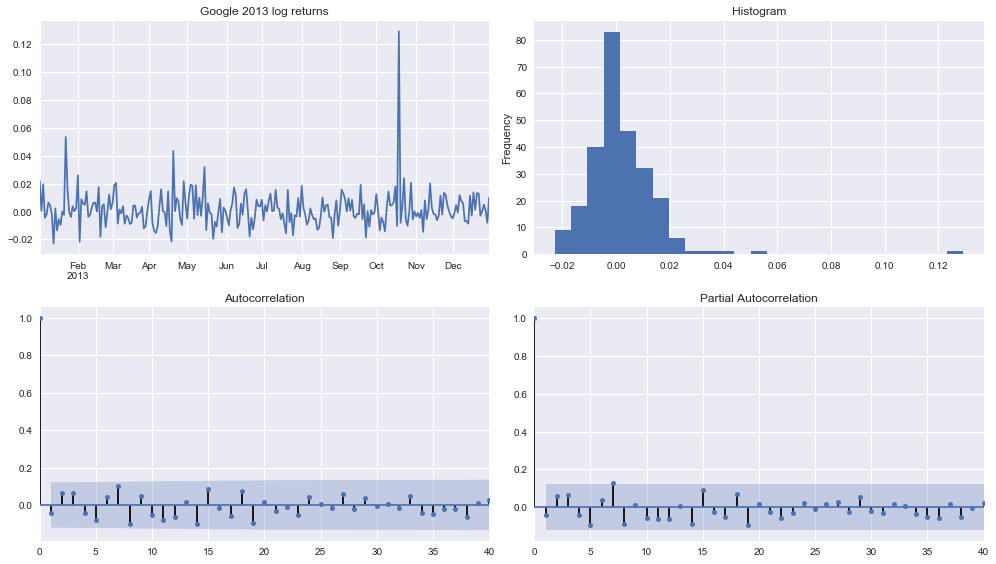

In [873]:
tsplot(google_returns_2013, title='Google 2013 log returns', lags = 40)

A time series plot is generated for the daily logarithmic returns of Google stock in 2013. 

The `google_returns_2013` series shows the daily returns of Google stock, previously computed using consecutive logarithmic price changes. The code passes this series as the input to the `tsplot` function, along with a title for the plot (`'Google 2013 log returns'`) and the number of lags to include in the autocorrelation plot (40 lags in this case).

The `tsplot` function then generates a figure with four subplots. Time series plots of the daily logarithmic returns are shown in the first subplot. A histogram represents the distribution of returns in the second subplot. Third and fourth subplots depict the autocorrelation function (ACF) and partial autocorrelation function (PACF). At different time lags, these plots provide insights into the correlations and potential patterns in returns. It is possible to gain insights into the behavior, volatility, and potential dependencies of Google stock daily returns in 2013 by examining the time series plot and ACF/PACF plot. Time series analysis commonly uses these visualizations to understand the characteristics of financial data and guide the selection of appropriate forecasting or analysis models.

(<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f631d0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a4233390>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a42bf320>)

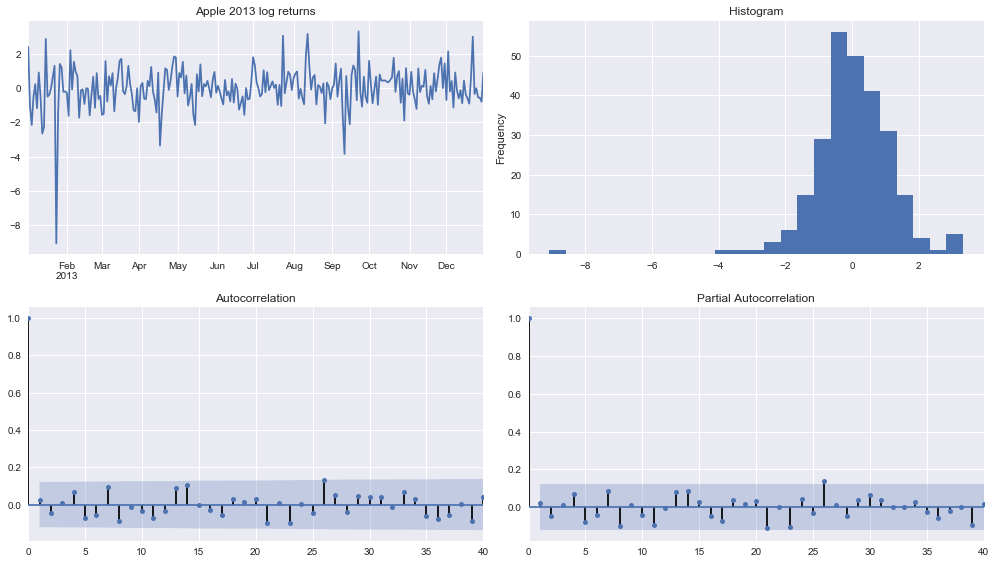

In [872]:
tsplot(apple_returns_2013, title='Apple 2013 log returns', lags = 40)

A time series plot of Apple stock's daily logarithmic returns from 2013 is generated by the code. 

It represents the daily returns of Apple stock, previously calculated as the difference between consecutive logarithmic prices. The code passes this series as the input to the `tsplot` function, along with a title for the plot (`'Apple 2013 log returns'`) and the number of lags to include in the autocorrelation plot (40 lags in this case). It then generates a figure with four subplots. A time series plot of the daily logarithmic returns is shown in the first subplot. As a second subplot, a histogram shows the distribution of the returns. Third and fourth subplots show autocorrelation function (ACF) and partial autocorrelation function (PACF). These plots provide insights into the correlation and potential patterns in the returns at different time lags.

By examining the time series plot and the ACF/PACF plot, one can gain insight into the behavior, volatility, and potential dependencies of the daily returns of Apple stock in 2013. In time series analysis, these visualizations are commonly used to understand the characteristics of financial data and select appropriate models for forecasting or analysis.

The time series appear to be stationarized after first differencing. Therefore, $d=1$ should be enforced. 

Returns appear to follow a random walk, with the current timestep uncorrelated with previous timesteps. This suggests an ARIMA(0,1,0) model, where the best prediction we can make is a constant value. For more information on ARIMA models, refer to the Duke reference.

The best ARIMA parameters are found by grid search

In [76]:
import itertools

import warnings
warnings.filterwarnings("ignore") # Ignore convergence warnings

def grid_search_SARIMA(y, pdq_min, pdq_max, seasonal_period):
    p = d = q = range(pdq_min, pdq_max+1)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], seasonal_period) for x in list(itertools.product(p, d, q))]
    
    best_params = []
    best_seasonal_params = []
    score = 1000000000000 # this is a bit of a hack
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                logging.info('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                if results.aic < score:
                    best_params = param
                    best_seasonal_params = param_seasonal
                    score = results.aic
            except:
                continue
    logging.info('\n\nBest ARIMA{}x{}12 - AIC:{}'.format(best_params, best_seasonal_params, score))
    return best_params, best_seasonal_params, score


params, seasonal_params, score = grid_search_SARIMA(google_price_ARIMA, 0, 2, 12)

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6898.362293047701
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6200.392463920813
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4377.816871987012
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:4278.05126125979
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4276.299285445659
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:4176.806413694854
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4465.432601601324
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4446.857399572644
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:4320.115713978383
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4386.46212764317
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4376.855567398701
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:4279.127651774714
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4454.8313975262445
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:4276.785787961944
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:4175.469208200152
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:4329.934376732559
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:4331.216630881858
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:4321.299433109684
ARIMA(0, 0,

The code performs a grid search for finding the best parameters for the SARIMA (Seasonal Autoregressive Integrated Moving Average) model applied to a given time series data (`y`).

The grid search iterates through various combinations of parameters (`pdq`) and seasonal parameters (`seasonal_pdq`) within specified ranges. To fit SARIMA models to time series data, these parameter combinations are used. The order of the SARIMA model is determined by the `pdq` combinations, and the seasonal order is determined by the `seasonal_pdq` combinations.

For each combination, the code attempts to fit a SARIMA model to the data using the `sm.tsa.statespace.SARIMAX` function from the `statsmodels` library. Afterwards, the model is evaluated based on the Akaike Information Criterion (AIC) value, which measures the trade-off between goodness of fit and complexity. Lower AIC values indicate better model fit. This code tracks the best parameter and seasonal parameter combinations that yield the lowest AIC score. A high value is set as the initial score. If a model with a lower AIC score is found, the `best_params`, `best_seasonal_params`, and `score` variables are updated accordingly. Upon completing the grid search, the code logs the best parameter and seasonal parameter combinations. As a final output, it returns the best parameter, the best seasonal parameter, and the AIC score.

In summary, the code automates the process of finding the optimal parameters for a SARIMA model by exhaustively searching through different combinations and selecting the one with the lowest AIC score. By using this approach, one can identify the most appropriate SARIMA model for forecasting or analyzing time series data.

Explore the results of fitting a model

In [271]:
mod = sm.tsa.statespace.SARIMAX(google_price_ARIMA,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0166      0.055     -0.302      0.763      -0.124       0.091
ma.L2          0.0173      0.061      0.284      0.776      -0.102       0.137
ma.S.L12      -1.0085    117.970     -0.009      0.993    -232.226     230.209
ma.S.L24       0.0085      1.017      0.008      0.993      -1.985       2.002
sigma2        27.0053   3186.030      0.008      0.993   -6217.499    6271.510


This code fits a SARIMAX (Seasonally Autoregressive Integrated Moving Average with Exogenous Variables) model to google_price_ARIMA data series. - Non-seasonal orders (p, d, q) are set to (0, 1, 2), indicating that the model includes an autoregressive component of order 0, a differencing component of order 1, and a moving average component of order 2. - The seasonal orders (P, D, Q, s) are set to (0, 1, 2, 12), indicating that the model includes a seasonal autoregressive component of order 0, a seasonal differencing of order 1, a seasonal moving average component of order 2, and a seasonal period of 12 (months in this case). - The `enforce_stationarity` and `enforce_invertibility` parameters are set to `False`, indicating that there is no strict enforcement of stationarity or invertibility of the model.  The `mod.fit()` function is used to fit the SARIMAX model to the data, and the results are stored in the `results` In addition, the code prints the summary table of the model results using `results.summary().tables[1]`. The table provides coefficient estimates, standard errors, p-values, and other statistics related to the fitted SARIMAX model.

In [272]:
pred = results.get_prediction(start = pd.to_datetime('2013-10-1'), end = pd.to_datetime('2013-12-31'), dynamic=False)
pred_ci = pred.conf_int()

Using the fitted SARIMAX model (results), the code predicts the value of a given variable. 

For predictions, the results object is called with the function get_prediction(). It specifies the range of dates for which predictions are made using the start and end parameters. In this case, the predictions are made from October 1, 2013, to December 31, 2013.

The `dynamic` parameter is set to `False`, indicating that the prediction is not dependent on previous forecasted values.

The predicted values are stored in the `pred` object, which contains information such as the predicted mean values and confidence intervals.

The `conf_int()` function is then called on the `pred` object to compute the confidence intervals for the predicted values. The resulting `pred_ci` object contains upper and lower confidence bounds.

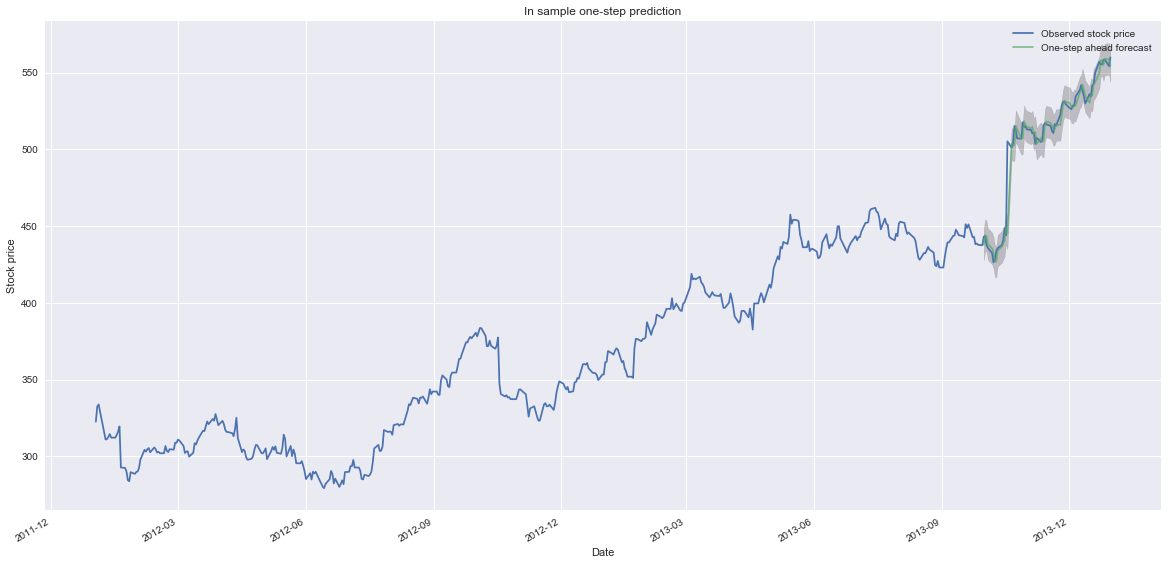

In [250]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(google_price_ARIMA.index, google_price_ARIMA, 
        label='Observed stock price')
ax.plot(pred.predicted_mean.index, pred.predicted_mean, 
        label='One-step ahead forecast', alpha=.7)
fig.autofmt_xdate()
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock price')
ax.set_title('In sample one-step prediction')
plt.legend()

This code generates a plot to visualize the observed stock price (`google_price_ARIMA`) and the one-step ahead forecast (`pred.predicted_mean`) for a specific time period.

A figure object (`fig`) and an axes object (`ax`) are created, specifying the size of the figure as 20x10.

The observed stock price is plotted using `ax.plot()` function, with the x-axis representing the dates from `google_price_ARIMA.index` and the y-axis representing the stock prices. This line is labeled as "Observed stock price". A one-step ahead forecast is also plotted using `ax.plot()`, with the x-axis representing the dates from `pred.predicted_mean.index` and the y-axis representing the predicted stock prices. This line is labeled as "One-step ahead forecast" and has an alpha value of 0.7 to make it slightly transparent.

The `fill_between()` function is used to fill the area between the upper and lower confidence bounds (`pred_ci.iloc[:, 0]` and `pred_ci.iloc[:, 1]`) with a black color and an alpha value of 0.2, creating a shaded region that represents the confidence interval of the forecast.

Axis labels for the x-axis and y-axis are set using `ax.set_xlabel()` and `ax.set_ylabel()`, respectively. Lastly, we add a legend to the plot using ’plt.legend()’ to differentiate between the predicted and observed stock price.

In [81]:
pred_dynamic = results.get_prediction(start = pd.to_datetime('2013-11-1'), dynamic=True, full_results=True)
pred_ci_dynamic = pred_dynamic.conf_int()

The code generates a dynamic prediction of the stock price using the SARIMA model (results). The prediction starts from the date '2013-11-1' and is performed dynamically, meaning that each forecasted value is used as an input for predicting the next value.

The `get_prediction()` method is called with the specified start date, enabling dynamic prediction by setting `dynamic=True`. Additionally, `full_results=True` is set to obtain the full set of results, including confidence intervals. This is displayed as a prediction object (pred_dynamic). The confidence intervals are extracted using the `conf_int()` method, storing them in the `pred_ci_dynamic` variable.

In general, this code produces a dynamic prediction of the stock price, allowing the forecasted values to influence the forecasts for subsequent time steps, and also provides confidence intervals.

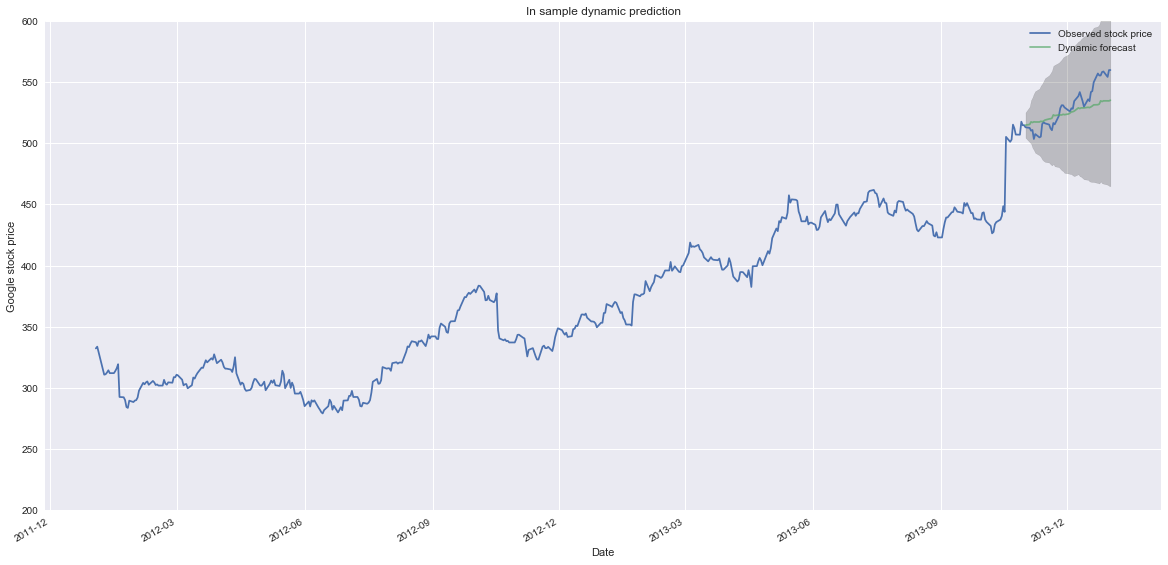

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(google_price_ARIMA.index, google_price_ARIMA, 
        label='Observed stock price')
ax.plot(pred_dynamic.predicted_mean.index, pred_dynamic.predicted_mean, 
        label='Dynamic forecast', alpha=.7)
fig.autofmt_xdate()
ax.fill_between(pred_ci_dynamic.index,
                pred_ci_dynamic.iloc[:, 0],
                pred_ci_dynamic.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Google stock price')
ax.set_title('In sample dynamic prediction')
ax.set_ylim(200,600)
plt.legend()

This code creates a plot to visualize the observed stock price (`google_price_ARIMA`) alongside the dynamic forecasted values obtained from the SARIMA model (`pred_dynamic`).  The `fig, ax = plt.subplots(figsize=(20,10))` line creates a figure and axes object with a specified size for the plot.  The `ax.plot()` function is used to plot the observed stock price on the axes, with the label 'Observed stock price'.  Next, the dynamic forecasted values are plotted using `ax.plot()`, with the label The 'dynamic forecast'. The `alpha` parameter controls the transparency of the line.  `fig.autofmt_xdate()` is used to format the x-axis tick labels for better readability.  The `ax.fill_between()` function is used to fill the area between the upper and lower confidence intervals (`pred_ci_dynamic`) with a color (`color='k'` refers to black) and transparency (`alpha=.2`).  The x-axis label is set to 'Date' using `ax.set_xlabel()`, and the y-axis label is set to 'Google stock price' using `ax.set_ylabel()`.  The title of the plot is set to 'In sample dynamic prediction' using `ax.set_title()`.  The y-axis limits are set to be between 200 and 600 using `ax.set_ylim()`.  Finally, the legend is displayed using `plt.legend()`, showing the labels for the observed stock price and the dynamic forecast.

In [84]:
# Get forecast 500 steps ahead in future
pred_future = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_future_ci = pred_future.conf_int()

This code generates forecasts for the stock price (`pred_future`) for a specified number of steps (100 steps in this case) into the future using the SARIMA model (`results`). Forecast values are obtained using results.get_forecast(). The `steps` parameter determines the number of steps into the future to forecast. By using pred_future.conf_int(), we can calculate the confidence intervals for the forecasted values (`pred_future`). Based on the resulting confidence intervals, we can estimate the range within which the actual future values will probably fall. The code allows us to generate forecasts of the stock price and their confidence intervals for the given company, extending the forecasts into the future beyond the data available at the time.

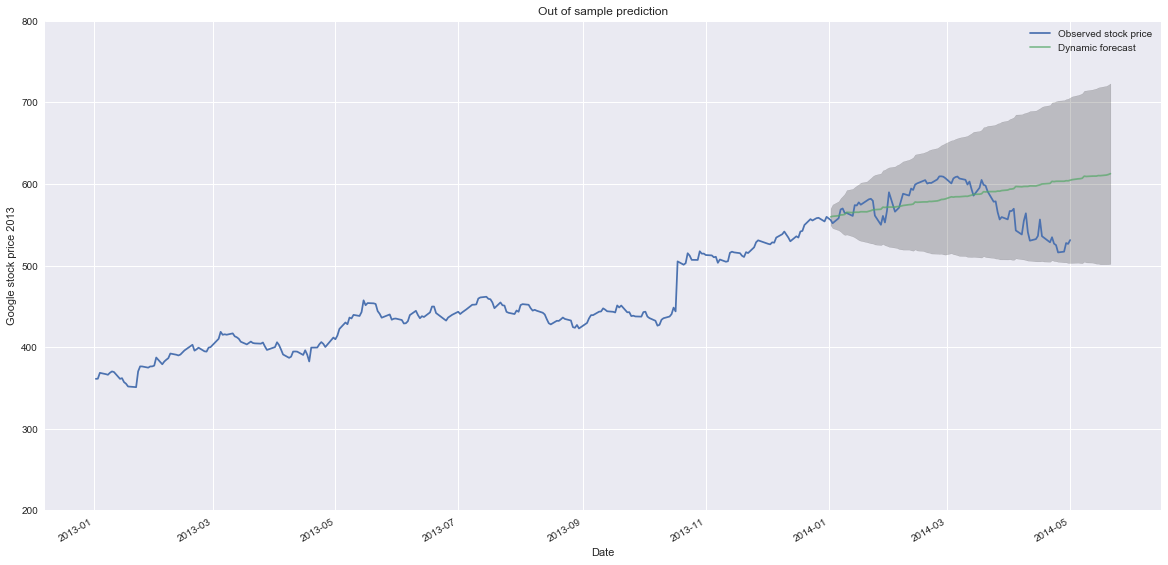

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(company_price_ARIMA['GOOG']['2013':'2014-05-01'].index, company_price_ARIMA['GOOG']['2013':'2014-05-01'], 
        label='Observed stock price')
ax.plot(pd.to_datetime(pred_future.predicted_mean.index), pred_future.predicted_mean, 
        label='Dynamic forecast', alpha=.7)
fig.autofmt_xdate()
ax.fill_between(pred_future_ci.index,
                pred_future_ci.iloc[:, 0],
                pred_future_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Google stock price 2013')
ax.set_title('Out of sample prediction')
ax.set_ylim(200,800)
plt.legend()

This code generates a plot (`fig, ax = plt.subplots(figsize=(20,10))`) to visualize the observed stock price for Google (`company_price_ARIMA['GOOG']['2013':'2014-05-01']`) and the dynamic forecasted values (`pred_future.predicted_mean`) for a future time period.

The observed stock price is plotted as a line graph, while the dynamic forecasted values are represented by another line graph. The `alpha=.7` parameter adjusts the transparency of the dynamic forecast line.

The `fig.autofmt_xdate()` function formats the x-axis labels of the plot to improve readability.

The confidence intervals (`pred_future_ci`) are represented as a shaded region around the dynamic forecast line using `ax.fill_between()`. This shaded region visually represents the uncertainty in the forecasted values. Date is indicated on the x-axis, Google stock price 2013 is indicated on the y-axis, and the plot is titled "Out of sample prediction". The `ax.set_ylim(200,800)` sets the y-axis limits to adjust the vertical scale of the plot. At the end, the plot legend is displayed, which displays the labels of the observed stock price and the dynamic forecast lines.

Training. ARIMA models are typically not trained across time series unless the data is generated from the same source. In the case of stock prices, there are independent influences on individual companies that do not affect all of them equally. We will therefore train 5 different ARIMA models for different companies, evaluating each model individually and averaging the results.

In [665]:
google_arima_train = company_price_df['GOOG']['2009':'2012']
amazon_arima_train = company_price_df['AMZN']['2009':'2012']
mmm_arima_train = company_price_df['MMM']['2009':'2012']
chipotle_arima_train = company_price_df['CMG']['2009':'2012']
duke_arima_train = company_price_df['DUK']['2009':'2012']

companies_train = [google_arima_train, amazon_arima_train, mmm_arima_train, chipotle_arima_train, duke_arima_train]

google_arima_test = company_price_df['GOOG']['2013':'2014']
amazon_arima_test = company_price_df['AMZN']['2013':'2014']
mmm_arima_test = company_price_df['MMM']['2013':'2014']
chipotle_arima_test = company_price_df['CMG']['2013':'2014']
duke_arima_test = company_price_df['DUK']['2013':'2014']

companies_test = [google_arima_test, amazon_arima_test, mmm_arima_test, chipotle_arima_test, duke_arima_test]

The code separates historical stock price data of different companies into training and testing sets. 

As part of the training set, the code selects stock price data from 2009 to 2012 for Google, Amazon, 3M, Chipotle, and Duke Energy. These datasets are stored in variables `google_arima_train`, `amazon_arima_train`, `mmm_arima_train`, `chipotle_arima_train`, and `duke_arima_train`, respectively.

For the testing sets, the code selects stock price data from 2013 to 2014 for the same companies. These datasets are stored in variables `google_arima_test`, `amazon_arima_test`, `mmm_arima_test`, `chipotle_arima_test`, and `duke_arima_test`, respectively.

By splitting the data into training and testing sets, it allows for the evaluation and validation of forecasting models using the historical data for training and assessing their performance on unseen data from the testing period.

In [666]:
company_results = []
for company_price in companies_train:
    model = sm.tsa.statespace.SARIMAX(company_price,
                                order=(0, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = model.fit()
    company_results.append(results)

For each company in the training set, this code models time series using SARIMAX (Seasonally Autoregressive Integrated Moving Average with Exogenous Factors). By specifying the order in which the autoregressive (AR), differencing (I), and moving average (MA) components are arranged, as well as the seasonal order, the code creates a SARIMAX model for each company. According to the SARIMAX model, the non-seasonal components have an order of (0, 1, 2), while the seasonal components have an order of (0, 1, 2, 12), indicating the seasonal pattern. Based on the historical stock price data of the company, the model is then fitted using the `fit()` method. An array of company_results contains the estimated parameters and other statistical information derived from the model fitting. By iterating over each company in the training set and fitting a SARIMAX model, this code allows for individual analysis and modeling of each company's stock price data.

Evaluation. Each model will be evaluated over three timescales: 5 days, 20 days, and 100 days. The short-term forecast provides a more reasonable measure of performance since long-term predictions are difficult, especially for stochastic processes.

In [682]:
forecast_5_day = []
forecast_20_day = []
forecast_100_day = []

for result in company_results:
    forecast_5_day.append(result.get_forecast(steps=5))
    forecast_20_day.append(result.get_forecast(steps=20))
    forecast_100_day.append(result.get_forecast(steps=100))

This code generates forecasts for multiple time horizons (5 days, 20 days, and 100 days) using the SARIMAX models previously fitted to the company stock price data.

For each model stored in the `company_results` list, the code calls the `get_forecast()` method with the specified number of steps to generate the forecasts. The `steps` parameter indicates the number of future periods for which the forecast is generated. Forecasts are divided into three lists: forecast_5_day, forecast_20_day, and forecast_100_day. For each time horizon, the SARIMAX model generates forecasts. By iterating over the fitted models, this code collects the forecasts for different time horizons, which allows further analysis and evaluation of the predicted future values of the stocks.

In [683]:
from sklearn.metrics import mean_absolute_error

forecast_5_day_mae = []
for true, pred in zip(companies_test, forecast_5_day):
    forecast_5_day_mae.append(mean_absolute_error(true.iloc[0:5], pred.predicted_mean))
    
forecast_20_day_mae = []
for true, pred in zip(companies_test, forecast_20_day):
    forecast_20_day_mae.append(mean_absolute_error(true.iloc[0:20], pred.predicted_mean))
    
forecast_100_day_mae = []
for true, pred in zip(companies_test, forecast_100_day):
    forecast_100_day_mae.append(mean_absolute_error(true.iloc[0:100], pred.predicted_mean))
    
    
print('Average MAE across companies (5 day): {:.6f}'.format(np.mean(forecast_5_day_mae)))
print('Average MAE across companies (20 day): {:.6f}'.format(np.mean(forecast_20_day_mae)))
print('Average MAE across companies (100 day): {:.6f}'.format(np.mean(forecast_100_day_mae)))

Average MAE across companies (5 day): 0.009500
Average MAE across companies (20 day): 0.009690
Average MAE across companies (100 day): 0.009965


Using this code, we compare the actual stock prices of companies in the test dataset to the forecasts generated by SARIMAX models for different time horizons (5, 20 and 100 days).

The code iterates over the `companies_test` and `forecast_X_day` lists, where `X` represents the respective time horizon. In each iteration, it computes the MAE by comparing the true values (`true.iloc[0:X]`) with the predicted mean values (`pred.predicted_mean`) for the corresponding time horizon.

The computed MAE values are then appended to separate lists: `forecast_5_day_mae`, `forecast_20_day_mae`, and `forecast_100_day_mae`.

Finally, the code prints the average MAE across the companies for each time horizon, providing an indication of the average forecast accuracy. Over the specified number of days, MAE values represent the average absolute difference between predicted and actual stock prices.

Here are the long-term predictions.

In [685]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(google_arima_test.iloc[0:100], label='True')
ax.plot(forecast_100_day[0].predicted_mean, label='Pred')
ax.set_title('ARIMA: 100 Day Forecast of Google (starting Jan 1, 2013)')
plt.legend()

A plot of the true stock prices of Google for the first 100 days of the test dataset is generated using this code, along with the ARIMA model's predicted stock prices for the same period. This code creates the figure and axes for the plot with the size set to (20, 10) to increase visibility.

The plot is generated using `ax.plot()`. The plot shows Google's true stock price for the first 100 days (`google_arima_test.iloc[0:100]`) with the label 'True'. It also plots the predicted mean stock prices for the same 100-day period (`forecast_100_day[0].predicted_mean`) with the label 'Pred'.

The title of the plot is set as 'ARIMA: 100 Day Forecast of Google (starting Jan 1, 2013)'.

Finally, `plt.legend()` is called to display the legend in the plot, indicating the labels for the true and predicted data.

Prediction of LSTM prices

Preparation of data

In [606]:
# Load a test company for inspection
LSTM_company_prices = load_company_price_history(['GOOG', 'AMZN', 'MMM', 'CMG', 'DUK'], normalize = True)

LSTM_prices_train = LSTM_company_prices['2009':'2012']
LSTM_prices_test = LSTM_company_prices['2013':'2014']
LSTM_prices_val = LSTM_company_prices['2015':'2016']

2017-09-20 22:09:46,753 - DEBUG - Reading company prices for GOOG
2017-09-20 22:09:46,759 - DEBUG - Reading company prices for AMZN
2017-09-20 22:09:46,763 - DEBUG - Reading company prices for MMM
2017-09-20 22:09:46,767 - DEBUG - Reading company prices for CMG
2017-09-20 22:09:46,771 - DEBUG - Reading company prices for DUK
2017-09-20 22:09:46,825 - INFO - Null values found after cleaning: False


Long Short-Term Memory (LSTM) models are used to inspect and analyze historical price data for several companies (GOOG, AMZN, MMM, CMG, DUK). The prices are normalized before further processing. There are three subsets of price data: training, testing, and validation. The training subset contains the price data from 2009 to 2012, the testing subset contains the price data from 2013 to 2014, and the validation subset contains the price data from 2015 to 2016.

These subsets are created to facilitate the training, evaluation, and fine-tuning of the LSTM model for predicting stock prices. In the training subset, the model is trained, in the testing subset, it is tested on unseen data, and in the validation subset, it is further evaluated and parameters are adjusted.

In [607]:
def price_generator(data, window=180, batch_size=128):
    ''' Accepts price history as a numpy array of shape (timesteps, companies) and builds windows for input, output 
    pairs. Output is calculated as the t+1 timestep. 
    
    Training/validation/testing data must be split prior to this generator. 
    
    Args:
        data: Array of company(ies) price history with shape (timesteps, companies)
        window: Length to build input and output sequences. 
        batch_size: Number of samples to return for batch training. 
        
    Yields:
        input_prices: A sequence of prices: [t-window, t-window+1, t-window+2, ..., t-1]
        output_prices: A sequence of prices offset by one day: [t-window+1, t-window+2, t-window+3, ..., t] 
    '''
    
    timesteps = data.shape[0]
    companies = data.shape[1]
    
    if window + batch_size > timesteps:
        logging.warning('Not enough data to fill a batch, forcing smaller batch size.')
        batch_size = timesteps - window
    
    # Index to keep track of place within price timeseries, corresponds with the last day of output
    i = window
    
    # Index to keep track of which company to query the data from
    j = 0
    
    while True:
        # If there aren't enough sequential days to fill a batch, go to next company
        if i + batch_size >= timesteps:
            i = window
            
            # If end of companies has been reached, start back at first company
            if j+1 >= companies:
                j=0
            else:
                j+=1
            
        
        samples = np.arange(i, i + batch_size)
        i += len(samples)
        
        input_prices = np.zeros((batch_size, window, 1))
        output_prices = np.zeros((batch_size, window, 1))
        
        for k, sample in enumerate(samples):
            input_prices[k] = data[np.arange(sample-window, sample),j].reshape(window, 1)
            output_prices[k] = data[np.arange(sample-window+1, sample+1),j].reshape(window, 1)
        
        yield input_prices, output_prices

In this code, a generator function is defined that takes a numpy array of company price history and creates input-output pairs for LSTM training. The generator generates batches of input and output sequences based on a specified window size and batch size. The parameters are the price history data, the window size, and the batch size. The window size determines the length of the input and output sequences, and the batch size determines the number of samples returned for each batch during training. This generator produces batches of inputs and outputs. With the help of indices, it keeps track of the current position within the price time series. Data from the next company is used if there are not enough sequential days to fill a batch. If the end of the companies has been reached, it starts back at the first company. The input and output sequences are constructed for each batch by selecting appropriate slices from the price data. Input sequence consists of prices from t-window to t-1, output sequence consists of prices from t-window+1 to t. The sequences are reshaped to have a specific shape required by the LSTM model. The generator repeatedly generates these input and output sequences during training.

In [608]:
window_size = 180 
batch_size = 64

train_gen = price_generator(LSTM_prices_train.values, window=window_size, batch_size=batch_size)
train_steps = (LSTM_prices_train.shape[0] // batch_size)*LSTM_prices_train.shape[1]

val_gen = price_generator(LSTM_prices_val.values, window=window_size, batch_size=batch_size)
val_steps = (LSTM_prices_val.shape[0] // batch_size)*LSTM_prices_val.shape[1]

test_gen = price_generator(LSTM_prices_test.values, window=window_size, batch_size=batch_size)
test_steps = (LSTM_prices_test.shape[0] // batch_size)*LSTM_prices_test.shape[1]

Using the price_generator function, this code sets up data generators for training, testing, and validating an LSTM model. 

Window size and batch size are determined by the variables window_size and batch_size. 

A price generator is called with the price history of the training data (LSTM_prices_train.values) as input. The generator is configured with the window_size and batch_size parameters. Based on the number of training data points and the batch size, the train_steps variable is calculated. It represents the number of steps needed to iterate through the training data using the generator. A similar generator is created for the validation and testing data (LSTM_prices_val and LSTM_prices_test). The corresponding `val_steps` and `test_steps` variables are calculated based on the sizes of the validation and testing data. Data generators and step counts are essential for training an LSTM model in batches and evaluating its performance.

The model needs to be built

In [609]:
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, LSTM


# define LSTM configuration
n_features = 1 # only price
window = 180 # look back 50 days
batch_size = 128

# create LSTM
price_only_model = Sequential()
price_only_model.add(LSTM(20, input_shape=(window, n_features), return_sequences=True))
price_only_model.add(LSTM(60, return_sequences=True))
price_only_model.add(TimeDistributed(Dense(1)))
print(price_only_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 180, 20)           1760      
_________________________________________________________________
lstm_8 (LSTM)                (None, 180, 60)           19440     
_________________________________________________________________
time_distributed_8 (TimeDist (None, 180, 1)            61        
Total params: 21,261.0
Trainable params: 21,261
Non-trainable params: 0.0
_________________________________________________________________
None


Using Keras, this code sets up an LSTM model for predicting stock prices. 

Layers define the model architecture. 

For the model, the input shape is set to (window, n_features), where window represents the number of previous days to consider for prediction, and n_features represents the number of input features (in this case, price is 1). 

Two LSTM layers make up the model. A first LSTM layer has 20 units and returns sequences, which means it passes the output sequence to the next layer. There are 60 units in the second LSTM layer, which also returns sequences. 

There is a second LSTM layer followed by a TimeDistributed and a Dense layer. In the TimeDistributed layer, each timestep of the model is applied to the Dense layer independently, enabling the model to make predictions based on each timestep. 

The model summary provides an overview of the model architecture, the number of parameters, and the shape of each layer's output.

In [611]:
from keras.callbacks import ModelCheckpoint 

price_only_model.compile(loss='mean_absolute_error', optimizer='adam')

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.price_only.hdf5', 
                               verbose=1, save_best_only=True)

# Train LSTM
history = price_only_model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=3, callbacks=[checkpointer], 
                                         validation_data=val_gen, validation_steps=val_steps)

Epoch 1/3
80/80 [==============================] - 85s - loss: 0.0121 - val_loss: 0.0108
Epoch 2/3
80/80 [==============================] - 79s - loss: 0.0125 - val_loss: 0.0109
Epoch 3/3
80/80 [==============================] - 79s - loss: 0.0117 - val_loss: 0.0108


This code sets up the training process for the LSTM model to predict stock prices.

First, the model is compiled by specifying the loss function ('mean_absolute_error') and the optimizer ('adam') to use during training.

A `ModelCheckpoint` callback is created, which will monitor the validation loss and save the weights of the best performing model during training. The weights are saved to the file path specified in the `filepath` parameter. Following that, the LSTM model is trained using the fit_generator method. It takes in the training generator (`train_gen`) which generates input-output pairs for training, the number of steps per epoch (`train_steps`) indicating the number of batches to process in each epoch, the number of epochs to train (`epochs`), and the validation generator (`val_gen`) and the number of validation steps (`val_steps`) for monitoring the model's performance on the validation data.  During training, the `ModelCheckpoint` callback will save the weights of the best model based on the A history object can be used to analyze and visualize the training progress and performance metrics, such as loss and validation loss.

In [645]:
# Load weights from previous training
price_only_model.load_weights('saved_models/weights.best.price_only.hdf5')

The code loads the saved weights from a previously trained LSTM model. It is recommended that the model's architecture and configuration match the model for which the weights were saved. As a result of loading the weights, the model's parameters are set to the values learned during previous training sessions. As a result, we can make predictions without having to train the model again.

In [191]:
def validation_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))

    plt.figure()
    plt.plot(epochs, loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

During the training process of a model, this code defines a function called validation_curve that plots training loss and validation loss over time. As input, the function accepts the history object, which contains the loss values recorded during training. Training and validation losses are extracted from the history object and plotted against the number of epochs. Green represents the training loss, and blue represents the validation loss. A plot provides a visual representation of the model's performance and training convergence. A model's overfitting or underfitting can be assessed, as well as the optimal number of epochs for training can be determined.

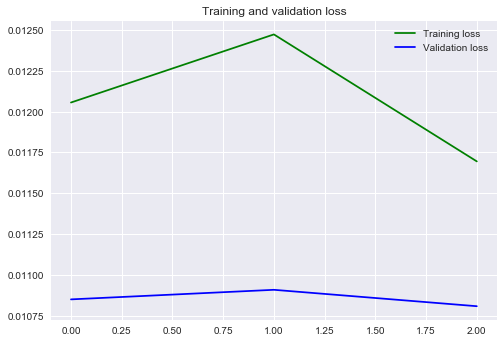

In [613]:
validation_curve(history)

The code passes the history object as an argument to the validation_curve function. During the training process of a model, the "history" object contains the recorded loss values. 

Calling validation_curve(history) executes the function, which plots the training loss and validation loss. Green represents the training loss, and blue represents the validation loss. On the x-axis, we have the number of epochs (training iterations) and on the y-axis, we have the loss values. 

Over the epochs, the plot shows how the training loss and validation loss change. As a result, it helps determine whether the model is converging effectively, identifying overfitting or underfitting, and understanding the model's performance during training. Compared to the validation loss, the training loss can provide insight into the model's generalization capability and assist in adjusting hyperparameters or stopping training.

Model evaluation

In [631]:
def forecast(seed_data, forecast_steps, model):
    '''
    Forecast future returns by making day-by-day predictions.
    
    Args:
        seed_data: Initial input sequence.
        forecast_steps: Defines how many steps into the future to predict.
        model: Trained LSTM prediction model. 
    '''
    
    future = []
    
    for timestep in range(forecast_steps):
        pred = model.predict(seed_data)[0][-1][0]
        future.append(pred)
        seed_data = np.append(seed_data[0][1:], [pred]).reshape(1, seed_data.shape[1], 1)

    return future

Forecast accepts three arguments: seed_data, forecast_steps, and model. 

This parameter represents the initial sequence of input data that the model will use to begin making predictions. It serves as the starting point for forecasting future returns. Forecast steps are determined by the forecast_steps parameter. It defines how many subsequent time steps the model will forecast. In the function, a future list is initialized to store predicted values of future returns. Next, a loop iterates `forecast_steps` times. Each iteration, the model predicts the next value based on the seed_data input sequence. The predicted value is added to the list of future values. Input sequences for the next prediction are updated by removing the first element and adding the predicted value at the end of the seed_data sequence. Upon completion of the function, a list of future returns is returned based on the seed_data, forecast_steps, and model provided.

In [638]:
# Define initial input sequence for forecasting
seed = company_prices_train.iloc[-window:]

initial_inputs = []
for company in seed:
    initial_inputs.append(seed[company].values.reshape(1, seed.values.shape[0], 1))

By selecting the last 'window' days of historical company prices from the 'company_prices_train' dataset, the code defines the initial input sequence for forecasting. 

Each company's input sequence is stored in a list called initial_inputs. It then iterates over each company and adds its values as a separate input sequence to the initial_inputs list. 

Each input sequence is reshaped to have the dimensions `(1, window, 1)`, where `1` represents the number of samples, `window` represents the length of the input sequence, and `1` represents the number of features (in this case, the price of the company). Essentially, the code separates historical prices for each company into individual sequences and reshapes them in a way that will enable the model to forecast them.

In [686]:
# Create forecasts 
forecast_5_day = []
forecast_20_day = []
forecast_100_day = []

for company_seed in initial_inputs:
    forecast_5_day.append(forecast(company_seed, 5, price_only_model))
    forecast_20_day.append(forecast(company_seed, 20, price_only_model))
    forecast_100_day.append(forecast(company_seed, 100, price_only_model))

Forecasts are generated for multiple companies using the trained LSTM model `price_only_model`. 

To store forecasts for different prediction horizons, it initializes three empty lists: "forecast_5_day", "forecast_20_day", and "forecast_100_day". 

Following that, it iterates over each company's initial input sequence in `initial_inputs`. Using the company's initial input sequence, the forecast horizon (5, 20, or 100), and the trained LSTM model (price_only_model), it calls the forecast function. 

Using the provided input sequence and the model, the forecast function makes day-by-day predictions for the specified forecast horizon. The resulting forecasts are appended to the corresponding list based on the forecast horizon. The `forecast_5_day`, `forecast_20_day`, and `forecast_100_day` lists contain the forecasts for each company at their respective forecast horizons.

In [687]:
# Evaluate forecasts
from sklearn.metrics import mean_absolute_error

forecast_5_day_mae = []
for i, pred in enumerate(forecast_5_day):
    forecast_5_day_mae.append(mean_absolute_error(company_prices_test.iloc[0:5, i], pred))
    
forecast_20_day_mae = []
for i, pred in enumerate(forecast_20_day):
    forecast_20_day_mae.append(mean_absolute_error(company_prices_test.iloc[0:20, i], pred))
    
forecast_100_day_mae = []
for i, pred in enumerate(forecast_100_day):
    forecast_100_day_mae.append(mean_absolute_error(company_prices_test.iloc[0:100, i], pred))


print('Average MAE across companies (5 day): {:.6f}'.format(np.mean(forecast_5_day_mae)))
print('Average MAE across companies (20 day): {:.6f}'.format(np.mean(forecast_20_day_mae)))
print('Average MAE across companies (100 day): {:.6f}'.format(np.mean(forecast_100_day_mae)))

Average MAE across companies (5 day): 0.012039
Average MAE across companies (20 day): 0.012486
Average MAE across companies (100 day): 0.011844


The code evaluates the forecasts generated by the LSTM model by calculating the mean absolute error (MAE) between the predicted values and the actual test data for different forecast horizons.

It initializes three empty lists: `forecast_5_day_mae`, `forecast_20_day_mae`, and `forecast_100_day_mae` to store the MAE values for different forecast horizons.

Then, it iterates over the forecasts in `forecast_5_day`, `forecast_20_day`, and `forecast_100_day`. For each forecast, it calculates the MAE by comparing the predicted values with the corresponding actual test data from `company_prices_test`.

The calculated MAE values are appended to the corresponding list based on the forecast horizon.

Finally, it prints the average MAE values across the companies for each forecast horizon using the `np.mean` function and formatted strings.

Forecast visualization

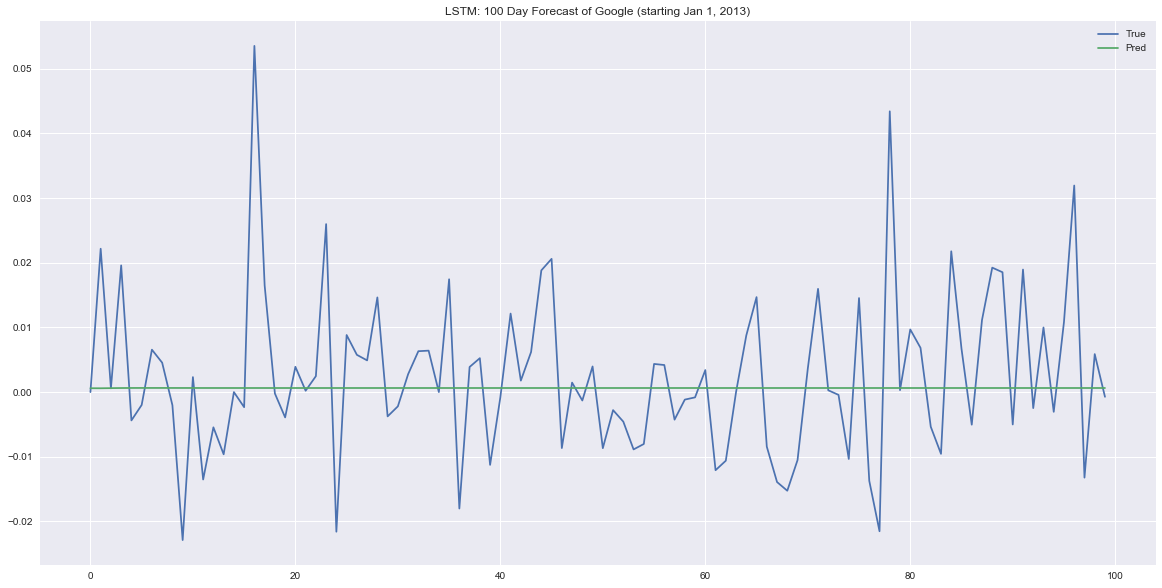

In [689]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(company_prices_test.iloc[0:100, 0].values, label='True')
ax.plot(forecast_100_day[0], label='Pred')
ax.set_title('LSTM: 100 Day Forecast of Google (starting Jan 1, 2013)')
plt.legend()

To visualize the true values and predicted values in the company_prices_test dataset, the code creates a line plot. The plot is generated using Matplotlib.

It creates a figure and axes with a specified size using `plt.subplots(figsize=(20,10))`.

Then, it plots the true values from the `company_prices_test` dataset for the first 100 days using `ax.plot(company_prices_test.iloc[0:100, 0].values, label='True')`. The `.iloc` indexing is used to select the first 100 rows of the first column (prices) of the `company_prices_test` dataset. Next, it plots the predicted values for the 100 days from the forecast_100_day list using ax.plot(forecast_100_day[0], label='Pred'). The `forecast_100_day` list contains the predicted values generated by the LSTM model.

It sets the title of the plot using `ax.set_title('LSTM: 100 Day Forecast of Google (starting Jan 1, 2013)')`.

Finally, it adds a legend to the plot using `plt.legend()` to indicate the labels for the true and predicted values.

Evaluation of test generators

In [669]:
mae = price_only_model.evaluate_generator(test_gen, steps=test_steps)
print('Mean absolute error on test data: {:.6f}'.format(mae))

Mean absolute error on test data: 0.009176


The code in this file evaluates the mean absolute error (MAE) of the LSTM model (`price_only_model`) on the test data. 

MAE is calculated using the LSTM model's evaluate_generator function. It is fed data from the test-gen generator, which provides batches of test data for the model. The `steps` parameter specifies the number of steps (or batches) to evaluate. The MAE is then printed using print('Mean absolute error on test data: [:.6f]'.format(mae)). The average absolute difference between the true and predicted values of the test data is determined by this measure.

Extraction of ConvNet features

In [487]:
companies = ['GOOG', 'AMZN', 'MMM', 'CMG', 'DUK']

company_transcripts_train = [load_company_transcripts(company)['2009':'2012'] for company in companies]
company_prices_train = load_company_price_history(companies, normalize=True)['2009':'2012']

company_transcripts_test = [load_company_transcripts(company)['2013':'2014'] for company in companies]
company_prices_test = load_company_price_history(companies, normalize=True)['2013':'2014']

company_transcripts_val = [load_company_transcripts(company)['2015':'2016'] for company in companies]
company_prices_val = load_company_price_history(companies, normalize=True)['2015':'2016']

2017-09-20 15:28:39,731 - DEBUG - Reading company transcripts for GOOG
2017-09-20 15:28:39,801 - WARNING - 1 duplicates removed from file
2017-09-20 15:28:39,861 - DEBUG - Reading company transcripts for AMZN
2017-09-20 15:28:39,921 - DEBUG - Reading company transcripts for ADBE
2017-09-20 15:28:39,999 - DEBUG - Reading company transcripts for AAPL
2017-09-20 15:28:40,072 - DEBUG - Reading company prices for GOOG
2017-09-20 15:28:40,080 - DEBUG - Reading company prices for AMZN
2017-09-20 15:28:40,084 - DEBUG - Reading company prices for ADBE
2017-09-20 15:28:40,088 - DEBUG - Reading company prices for AAPL
2017-09-20 15:28:40,145 - INFO - Null values found after cleaning: False
2017-09-20 15:28:40,148 - DEBUG - Reading company transcripts for GOOG
2017-09-20 15:28:40,194 - WARNING - 1 duplicates removed from file
2017-09-20 15:28:40,259 - DEBUG - Reading company transcripts for AMZN
2017-09-20 15:28:40,317 - DEBUG - Reading company transcripts for ADBE
2017-09-20 15:28:40,383 - DEBUG 

Multi-company training, testing, and validation data are prepared by this code. 

Using the 'load_company_transcripts' function, each company transcription for the training, testing, and validation periods is loaded. The training transcripts cover the years 2009-2012, the testing transcripts cover 2013-2014, and the validation transcripts cover 2015-2016.

Similarly, it loads the price history for the same set of companies using the `load_company_price_history` function, normalizing the prices to ensure consistency. During 2009-2012, the training price history was covered, during 2013-2014, and between 2015-2016 was covered by the testing price history.

The result is separate sets of transcripts and price history data for training, testing, and validation, corresponding to each company in the `companies` list.

In [527]:
def text_generator(price_data, text_data, w2v_reduced, window=5, batch_size=1):
    '''
    Creates samples for ConvNet training which accepts a 2D array representation of text as input and predicts the
    following 5 day log-return. 
    
    Args:
        price_data: A Pandas DataFrame consisting of daily price information, consisting of multiple companies
        across the columns. 
        text_data: A list of Pandas Dataframes, each item in the list is a DataFrame of one company's collection
        of earnings call transcripts. 
        w2v_reduced: A dictionary mapping words to a 2D vector representation, used for converting the text
        into a 2D array representation. 
        
    Returns:
        text: A 2D array representation of an earnings call transcript.
        price_target: The resulting 5 day log-return after the earnings call took place. 
    '''
    companies = len(text_data)
    
    # Start with first transcript
    i = 0
    
    # Start with first company
    j = 0
    
    text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
    
    while True:
        # If end of transcripts reached, go to next company
        if i >= len(lookup):
            i = 0
            if j+1 >= companies:
                j=0
            else:
                j+=1
                
            text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
        
        
        event = lookup.index[i]
        text = text_docs[i].reshape(1, text_docs[i].shape[0], text_docs[i].shape[1], 1)
        price_target = company_prices[event : event + pd.to_timedelta('{} days'.format(window+1))].iloc[:,j].sum()
        
        yield text, np.array(price_target).reshape(1)
        
        i+= 1

Generates training samples for a ConvNet using this code. 

The function takes price data, which is a Pandas DataFrame containing daily price information for multiple companies, and text data, which is a list of Pandas DataFrames where each DataFrame represents the collection of earnings call transcripts for a particular company.

Training samples are generated by iterating through transcripts in the generator function. The first transcript and the first company are the starting points. It processes the text of the transcript using the `process_text_for_input` function, which converts the text into a 2D array representation using word embeddings (word-to-vector mapping). It then loops endlessly. If it reaches the end of a transcript for a particular company, it moves on to the next. It retrieves the 2D array representation of the current transcript and reshapes it to match the expected input shape for the ConvNet. Next, it calculates the price target. Following an earnings call, the price target is the sum of the prices for a window of days. With each iteration, the function returns the text (2D array representation of the transcript) and the price target as the output. A loop in the generator function generates training samples indefinitely by looping through transcripts and companies.

In [528]:
window_size = 5
batch_size = 12

train_gen = text_generator(company_prices_train, company_transcripts_train, w2v_reduced, 
                           window=window_size, batch_size=batch_size)
train_steps = sum([len(company) for company in company_transcripts_train])


val_gen = text_generator(company_prices_val, company_transcripts_val, w2v_reduced, 
                         window=window_size, batch_size=batch_size)
val_steps = sum([len(company) for company in company_transcripts_val])


test_gen = text_generator(company_prices_test, company_transcripts_test, w2v_reduced, 
                          window=window_size, batch_size=batch_size) 
test_steps = sum([len(company) for company in company_transcripts_test])

This code sets up generators for training, validation, and testing data for a ConvNet model.

For training data, the `text_generator` function is called with the `company_prices_train` DataFrame, `company_transcripts_train` list, `w2v_reduced` dictionary, and the specified window size and batch size. With this generator, you'll be able to generate training samples with text (2D array representations of earnings call transcripts) and the corresponding price target (sum of prices for a window of days following the earnings call). The `train_steps` variable is calculated as the sum of the lengths of all company transcripts in the training data.

Similarly, for validation data, the `text_generator` function is called with the `company_prices_val` DataFrame, `company_transcripts_val` list, `w2v_reduced` dictionary, and the specified window size and batch size. Validation samples will be generated by this generator. The `val_steps` variable is calculated as the sum of the lengths of all company transcripts in the validation data.

For testing data, the `text_generator` function is called with the `company_prices_test` DataFrame, `company_transcripts_test` list, `w2v_reduced` dictionary, and the specified window size and batch size. Testing samples will be generated by this generator. The `test_steps` variable is calculated as the sum of the lengths of all company transcripts in the testing data.

As generators and steps variables enable the model to be fed the necessary input data in batches and track how many steps each dataset requires, they are essential for training and evaluating the model.

In [529]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout

text_features = 10

text_model = Sequential()
text_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(250, 250, 1)))
text_model.add(Conv2D(32, (3, 3), activation='relu'))
text_model.add(MaxPooling2D((4, 4)))
text_model.add(Conv2D(16, (3, 3), activation='relu'))
text_model.add(GlobalAveragePooling2D())
text_model.add(Dense(100, activation='relu'))
text_model.add(Dropout(0.4))
text_model.add(Dense(text_features, activation='relu'))
text_model.add(Dense(1, activation='linear'))

print(text_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 250, 250, 32)      320       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 248, 248, 32)      9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 60, 60, 16)        4624      
_________________________________________________________________
global_average_pooling2d_23  (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 100)               1700      
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
__________

This code defines a ConvNet model for processing text features. Layers are added sequentially to the Sequential model. In the first layer, there is a `Conv2D` layer with 32 filters, a kernel size of (3, 3), and ReLU activation. A 2D array representation of text data is indicated by the shape (250, 250, 1). The padding is set to 'same', which means the input and output have the same spatial dimensions. There is one more Conv2D layer with 32 filters and a kernel size of (3, 3). It is followed by a `MaxPooling2D` layer with a pooling size of (4, 4), which reduces the spatial dimensions of the feature maps. The next layer is a `Conv2D` layer with 16 filters and a kernel size of (3, 3). This is followed by a `GlobalAveragePooling2D` layer, which performs average pooling across the spatial dimensions of the feature maps. Following that is a fully connected `Dense` layer with 100 units and ReLU activation. A `Dropout` layer with a rate of 0.4 is added for regularization to prevent overfitting.

Another `Dense` layer with `text_features` units and ReLU activation is added, followed by a final `Dense` layer with 1 unit and linear activation, which produces the output prediction.

The `summary()` method is called to print a summary of the model architecture, showing the shapes and parameters of each layer.

In [530]:
from keras.callbacks import ModelCheckpoint 

text_model.compile(loss='mean_absolute_error', optimizer='adam')

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.text_feature_extractor.hdf5', 
                               verbose=1, save_best_only=True)

# Train LSTM
history = text_model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=20, callbacks=[checkpointer], 
                                         validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20


2017-09-20 15:44:14,414 - INFO - 1 same-day events combined.


67/73 [==========================>...] - ETA: 1s - loss: 0.0634

2017-09-20 15:44:26,136 - INFO - 1 same-day events combined.


73/73 [==============================] - 15s - loss: 0.0625 - val_loss: 0.0616
Epoch 2/20
64/73 [=========================>....] - ETA: 1s - loss: 0.0631

2017-09-20 15:44:40,606 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0620 - val_loss: 0.0614
Epoch 3/20
64/73 [=========================>....] - ETA: 1s - loss: 0.0624

2017-09-20 15:44:55,000 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0612 - val_loss: 0.0619
Epoch 4/20
63/73 [========================>.....] - ETA: 1s - loss: 0.0622

2017-09-20 15:45:09,215 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0606 - val_loss: 0.0635
Epoch 5/20
61/73 [========================>.....] - ETA: 2s - loss: 0.0628

2017-09-20 15:45:23,228 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0602 - val_loss: 0.0639
Epoch 6/20
62/73 [========================>.....] - ETA: 1s - loss: 0.0623

2017-09-20 15:45:37,605 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0599 - val_loss: 0.0639
Epoch 7/20
61/73 [========================>.....] - ETA: 2s - loss: 0.0629

2017-09-20 15:45:51,679 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0598 - val_loss: 0.0638
Epoch 8/20
60/73 [=======================>......] - ETA: 2s - loss: 0.0636

2017-09-20 15:46:04,778 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0595 - val_loss: 0.0638
Epoch 9/20
58/73 [======================>.......] - ETA: 2s - loss: 0.0646

2017-09-20 15:46:18,039 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0605 - val_loss: 0.0638
Epoch 10/20
58/73 [======================>.......] - ETA: 2s - loss: 0.0643

2017-09-20 15:46:32,766 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0596 - val_loss: 0.0638
Epoch 11/20
55/73 [=====================>........] - ETA: 3s - loss: 0.0660

2017-09-20 15:46:46,568 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0604 - val_loss: 0.0639
Epoch 12/20
56/73 [======================>.......] - ETA: 2s - loss: 0.0653

2017-09-20 15:47:00,557 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0600 - val_loss: 0.0639
Epoch 13/20
53/73 [====================>.........] - ETA: 3s - loss: 0.0664- ETA: 3s - loss: 0.06

2017-09-20 15:47:13,934 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0598 - val_loss: 0.0640
Epoch 14/20
52/73 [====================>.........] - ETA: 3s - loss: 0.0672

2017-09-20 15:47:27,172 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0600 - val_loss: 0.0640
Epoch 15/20
52/73 [====================>.........] - ETA: 3s - loss: 0.0670

2017-09-20 15:47:40,352 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0609 - val_loss: 0.0641
Epoch 16/20
50/73 [===================>..........] - ETA: 3s - loss: 0.0669

2017-09-20 15:47:53,699 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0595 - val_loss: 0.0641
Epoch 17/20
49/73 [===================>..........] - ETA: 3s - loss: 0.0683

2017-09-20 15:48:07,251 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0597 - val_loss: 0.0641
Epoch 18/20
47/73 [==================>...........] - ETA: 4s - loss: 0.0700

2017-09-20 15:48:20,908 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0608 - val_loss: 0.0641
Epoch 19/20
46/73 [=================>............] - ETA: 4s - loss: 0.0693

2017-09-20 15:48:34,990 - INFO - 1 same-day events combined.


73/73 [==============================] - 14s - loss: 0.0608 - val_loss: 0.0641
Epoch 20/20
47/73 [==================>...........] - ETA: 4s - loss: 0.0672

2017-09-20 15:48:49,127 - INFO - 1 same-day events combined.


73/73 [==============================] - 13s - loss: 0.0597 - val_loss: 0.0642


This code compiles and trains the text feature extraction model (`text_model`) using the training and validation data generators. It starts by specifying the loss function (`mean_absolute_error`) and optimizer (`adam`). This prepares the model for training. During training, the weights of the best performing model are saved. It specifies the file path to save the weights, and the option `save_best_only=True` ensures that only the weights of the model with the lowest validation loss will be saved. To train the model, call the fit_generator function. It takes the training data generator (`train_gen`) as input and specifies the number of steps per epoch (`train_steps`) and the number of epochs (in this case, 20). The `callbacks` argument is set to include the `ModelCheckpoint` callback for saving the best weights.

Additionally, the validation data generator (`val_gen`) and the number of validation steps (`val_steps`) are provided to evaluate the model's performance on the validation set during training.

The training history is stored in the `history` variable, which can be used to analyze the training and validation metrics and visualize the learning progress.

In [531]:
# Load weights from previous training
text_model.load_weights('saved_models/weights.best.text_feature_extractor.hdf5')

Using these weights, one can access the previously trained model (`text_model`) from a saved file. 

Loading the previously learned weights is done by calling the "load_weights" function and providing the file path to the dataset (saved_models/weights.best.text_feature_extractor.hdf5) as the input. This allows you to reuse the trained model without having to retrain it from scratch. The weights can be loaded to apply the model to new data or to continue training from a previous point. As with the previously trained and saved model, the loaded model will have the same architecture and parameter values.

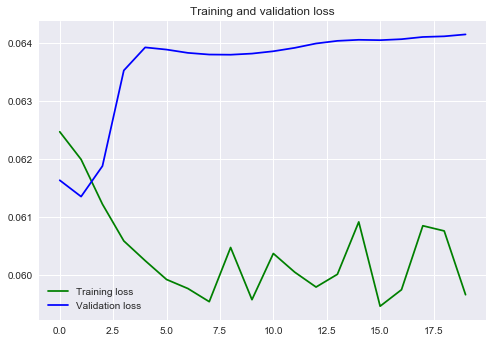

In [532]:
validation_curve(history)

The code `validation_curve(history)` is likely calling a function named `validation_curve` and passing the `history` object as an argument. 

It is likely that the validation_curve function generates a plot or visualization of the training and validation loss over the course of machine learning training. 

The history object can be passed to the validation curve function to access the recorded loss values during training and plot the training and validation curves. By using this visualization, you can determine whether the model is overfitting or underfitting during training.

In [403]:
text_model.layers

This function returns a list of the layers in the text model. An input layer represents a different operation or transformation. 

Layers provide information about the model's architecture and configuration. Layer properties include type (e.g., Conv2D, MaxPooling2D), activation function, and number of parameters. 

This attribute allows you to examine and analyze the individual layers in a text model. Various purposes can be accomplished using this information, such as understanding the model's structure, inspecting and modifying specific layers, or extracting and visualizing intermediate outputs.

In [533]:
extract_features = Sequential()
extract_features.add(Conv2D(32, (3, 3), activation='relu', padding='same', 
                            input_shape=(250, 250, 1), weights=text_model.layers[0].get_weights()))
extract_features.add(Conv2D(32, (3, 3), activation='relu', weights=text_model.layers[1].get_weights()))
extract_features.add(MaxPooling2D((4, 4), weights=text_model.layers[2].get_weights()))
extract_features.add(Conv2D(16, (3, 3), activation='relu', weights=text_model.layers[3].get_weights()))
extract_features.add(GlobalAveragePooling2D(weights=text_model.layers[4].get_weights()))
extract_features.add(Dense(100, activation='relu', weights=text_model.layers[5].get_weights()))
extract_features.add(Dropout(0.4, weights=text_model.layers[6].get_weights()))
extract_features.add(Dense(text_features, activation='linear', weights=text_model.layers[7].get_weights()))

The code defines a new sequential model called `extract_features` that is built by extracting and transferring the weights from specific layers of the `text_model` into corresponding layers of the new model.

Each layer in the `extract_features` model corresponds to a layer in the `text_model`. The weights from the corresponding layers in the `text_model` are retrieved using the `get_weights()` method and set as the weights for the respective layers in the `extract_features` model.

By doing this, the `extract_features` model inherits the learned weights from the `text_model`, allowing it to perform the same transformations and computations on input data. Using this method allows you to use the pre-trained features extracted by the `text_model` in another model or for a different task without retraining the entire model.

In [536]:
extract_features.predict(text)

array([[-0.0212712 ,  0.00477908, -0.01075181,  0.00255826, -0.01825933,
        -0.00846098,  0.01881904, -0.00580684, -0.01098066, -0.01511178]], dtype=float32)

With the code extract_features.predict(text), the extract_features model is applied to the given input. 

This model extracts features from input data using a pre-trained model. By calling the `predict` method on the model and providing the `text` as input, the model applies its learned transformations and computations to the input text and generates predictions based on the extracted features.

The output of the `predict` method will be the predicted values or representations based on the extracted features. As a result, the interpretation and format of the predictions will vary depending on the precise task and architecture of the `extract_features` model.

In [537]:
# Run this cell to inspect a new example
text, price = next(test_gen)

print('Predicted return:\t{}'.format(text_model.predict(text)[0][0]))
print('True return:\t\t{}'.format(price[0]))

Predicted return:	0.01737634837627411
True return:		0.06355231462064292


The code snippet provided is used to inspect a new example and compare the predicted return with the true return. A call to the next(test_gen) function is used to retrieve the next example. This example consists of `text` and `price` data. A prediction is made using the text_model.predict(text) function. The predicted return is obtained from the prediction result. By comparing the predicted return and the true return, the console can be inspected and compared.

In [539]:
# Visualize input
from PIL import Image
pillow_image = Image.fromarray(1500*text[0, :, :, 0])
pillow_image.show()

The provided code snippet is used to visualize the input data.

First, the code imports the `Image` class from the `PIL` library.

Next, the `Image.fromarray()` function is called to create an `Image` object. For enhanced visualization, it applies a scaling factor of 1500 to the input text data. Input data is assumed to be a 4-dimensional array with shape `(batch_size, height, width, channels)`, and the first example in the batch is selected (`text[0]`). The `[:, :, 0]` indexing is used to access the values of the first channel in the input data. Finally, the pillow_image object is called to display the visualization of the first channel.

Model evaluation

In [538]:
mae = text_model.evaluate_generator(test_gen, steps=test_steps)
print('Mean absolute error on test data: {}'.format(mae))

Mean absolute error on test data: 0.057885023705180616


The provided code calculates the mean absolute error (MAE) on the test data using the trained `text_model`. In order to calculate MAE, the `evaluate_generator()` method is called on the `text_model` with the `test_gen` generator as input. In this method, output values are predicted and compared with the true values to evaluate the model's performance. It calculates the MAE metric. The steps parameter specifies how many times to iterate over the test data generator. It is set to `test_steps`, which represents the total number of steps needed to complete one epoch of the test data. Following that, the calculated MAE value is printed using the print() function.

Prediction of price and text using LSTM

In [710]:
companies = ['GOOG', 'AMZN', 'MMM', 'CMG', 'DUK']

company_transcripts_train = [load_company_transcripts(company)['2009':'2012'] for company in companies]
company_prices_train = load_company_price_history(companies, normalize=True)['2009':'2012']

company_transcripts_test = [load_company_transcripts(company)['2013':'2014'] for company in companies]
company_prices_test = load_company_price_history(companies, normalize=True)['2013':'2014']

company_transcripts_val = [load_company_transcripts(company)['2015':'2016'] for company in companies]
company_prices_val = load_company_price_history(companies, normalize=True)['2015':'2016']

2017-09-22 14:25:08,678 - DEBUG - Reading company transcripts for GOOG
2017-09-22 14:25:09,014 - WARNING - 1 duplicates removed from file
2017-09-22 14:25:09,150 - DEBUG - Reading company transcripts for AMZN
2017-09-22 14:25:09,280 - DEBUG - Reading company transcripts for MMM
2017-09-22 14:25:09,437 - DEBUG - Reading company transcripts for CMG
2017-09-22 14:25:09,488 - WARNING - 1 duplicates removed from file
2017-09-22 14:25:09,556 - DEBUG - Reading company transcripts for DUK
2017-09-22 14:25:09,699 - DEBUG - Reading company prices for GOOG
2017-09-22 14:25:09,711 - DEBUG - Reading company prices for AMZN
2017-09-22 14:25:09,716 - DEBUG - Reading company prices for MMM
2017-09-22 14:25:09,720 - DEBUG - Reading company prices for CMG
2017-09-22 14:25:09,725 - DEBUG - Reading company prices for DUK
2017-09-22 14:25:09,801 - INFO - Null values found after cleaning: False
2017-09-22 14:25:09,805 - DEBUG - Reading company transcripts for GOOG
2017-09-22 14:25:09,898 - WARNING - 1 dupli

The provided code defines and organizes the data for training, testing, and validation of a model using company transcripts and price history.

The variable `companies` contains a list of company names.

`company_transcripts_train` is a list that stores the transcripts of the specified companies for the years 2009 to 2012. The function `load_company_transcripts()` is called for each company, and the resulting transcripts are filtered based on the specified date range. The company prices train database contains historical prices for the companies between 2009 and 2012. The function `load_company_price_history()` is called with a list of companies, and the resulting price history is filtered according to the specified date range. The prices are also normalized. Company transcripts tested by company_transcripts_test and compared by company_transcripts_val are also normalized. These lists are created by calling `load_company_transcripts()` and filtering the transcripts based on the corresponding date ranges.

`company_prices_test` and `company_prices_val` store the price history of the specified companies for the years 2013 to 2014 and 2015 to 2016, respectively. DataFrames are created by loading the company's price history and filtering it according to the relevant date ranges. Normalization is also applied to the prices.

In [711]:
window_size = 180
batch_size = 128
text_features = 10

train_gen = price_text_generator(company_prices_train, company_transcripts_train, w2v_reduced, extract_features, 
                                 text_features=text_features, window=window_size, batch_size=batch_size)
train_steps = (company_prices_train.shape[0] // batch_size)*company_prices_train.shape[1]


val_gen = price_text_generator(company_prices_val, company_transcripts_val, w2v_reduced, extract_features, 
                               text_features=text_features, window=window_size, batch_size=batch_size)
val_steps = (company_prices_test.shape[0] // batch_size)*company_prices_test.shape[1]


test_gen = price_text_generator(company_prices_test, company_transcripts_test, w2v_reduced, extract_features, 
                                text_features=text_features, window=window_size, batch_size=batch_size) 
test_steps = (company_prices_test.shape[0] // batch_size)*company_prices_test.shape[1]

The provided code sets up generators for training, validation, and testing data that combine price history and textual data.

The variables `window_size`, `batch_size`, and `text_features` define the size of the sliding window, the number of samples in each batch, and the number of features in the textual data, respectively.

`train_gen` is a generator that combines the price history (`company_prices_train`) and transcripts (`company_transcripts_train`) of the companies. A price text generator is used, which takes the price history, transcripts, reduced word embeddings (w2v_reduced) and extracted features (extract_features). The window size, batch size, and number of text features are also specified. For training, the generator will produce batches of input and output data. The `train_steps` variable is calculated based on the number of training data points and the batch size.

Similarly, `val_gen` and `test_gen` are generators for the validation and testing data. The price history and transcripts are used for validation (`company_prices_val`, `company_transcripts_val`) and testing (`company_prices_test`, `company_transcripts_test`). Generates are configured with the same parameters as train generators. Based on the number of validation and testing data points and the batch size, the val_steps and test_steps variables are calculated.

In [712]:
def price_text_generator(price_data, text_data, w2v_reduced, extract_features_model, text_features, 
                         window=180, batch_size=128):
    ''' Creates samples for training, combining daily price information with extracted text features.
    
    Training/validation/testing data must be split prior to this generator. 
    
    Args:
        price_data: A Pandas DataFrame consisting of daily price information, consisting of multiple companies
        across the columns. 
        text_data: A list of Pandas Dataframes, each item in the list is a DataFrame of one company's collection
        of earnings call transcripts. 
        w2v_reduced: A dictionary mapping words to a 2D vector representation, used for converting the text
        into a 2D array representation.
        extract_features_model: ConvNet model for extracting features from text. 
        text_features: Number of text features extracted from extract_features_model.
        window: Length to build input and output sequences. 
        batch_size: Number of samples to return for batch training. 
        
    Yields:
        input_features: A sequence of prices and daily extracted text features
        [t-window, t-window+1, t-window+2, ..., t-1]
        output_prices: A sequence of prices offset by one day: [t-window+1, t-window+2, t-window+3, ..., t] 
    '''
    
    timesteps = price_data.shape[0]
    companies = price_data.shape[1]
    
    if window + batch_size > timesteps:
        logging.warning('Not enough data to fill a batch, forcing smaller batch size.')
        batch_size = timesteps - window
    
    # Index to keep track of place within price timeseries, corresponds with the last day of output
    i = window
    
    # Index to keep track of company
    j = 0
    
    # Prepare text
    text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
    lookup = lookup.reindex(price_data)
    
    # Create empty array to fill with text features
    text = np.empty((len(lookup), text_features))
    
    # Get text features
    for i, val in enumerate(lookup):
        if np.isnan(val):
            text[i] = np.zeros(text_features)
        else:
            val = int(val)
            text[i] = extract_features_model.predict(text_docs[val].reshape(250, 250, 1))

    while True:
        # If there aren't enough sequential days to fill a batch, start back at top
        if i + batch_size >= timesteps:
            i = window
            
            if j+1 >= companies:
                j=0
            else:
                j+=1
                # Prepare text
                text_docs, lookup = process_text_for_input(text_data[j]['body'], w2v_reduced, norm='l2')
                lookup = lookup.reindex(price_data)

        
        samples = np.arange(i, i + batch_size)
        i += len(samples)
        
        input_prices = np.zeros((batch_size, window, 1))
        input_text = np.zeros((batch_size, window, text_features))
        output_prices = np.zeros((batch_size, window, 1))
        
        for k, sample in enumerate(samples):
            input_prices[k] = price_data.iloc[np.arange(sample-window, sample),j].values.reshape(window, 1)
            input_text[k] = text[sample-window : sample]
            output_prices[k] = price_data.iloc[np.arange(sample-window+1, sample+1),j].values.reshape(window, 1)
        
        input_prices_with_text = np.append(input_prices, input_text, axis=2)
        
        yield input_prices_with_text, output_prices

The provided code defines a generator function, `price_text_generator`, which generates training samples that combine daily price information with extracted text features.  The generator takes several inputs: `price_data` (a Pandas DataFrame with daily price information for multiple companies), `text_data` (a list of Pandas DataFrames containing earnings call transcripts), `w2v_reduced` (a dictionary mapping words to vector representations), `extract_features_model` (a ConvNet model for It takes a text feature extractor to extract, a text feature extractor to extract, a window (the length of input and output sequences), and a batch_size (the number of samples to be returned for batch training). To fill a batch, the generator first checks if enough data exists. If not, it adjusts the batch size accordingly. After that, it initializes variables for tracking the position in the price time series (`i`) and the company (`j`). The text is processed using the process_text_for_input function, and the extracted text features are obtained by using the extract_features_model function. The text features are stored in a `text` array. As input and output data are generated, the generator enters an infinite loop. When there aren't enough sequential days to fill a batch, it starts over. For input prices, input text features, and output prices, the generator selects a range of samples. Input prices and text features are combined into one array. This input-output pair is then yielded by the generator. As long as the generator is called, it continuously yields batches of input-output pairs.

In [713]:
input_features, output_prices = next(train_gen)

2017-09-22 14:25:23,171 - INFO - 1 same-day events combined.


This code retrieves the next batch of training data from the `train_gen` generator. In particular, it assigns the values returned by the generator to the variables input_features and output_prices. 

'input_features' contains a batch of input data containing both price information and extracted text features. The shape of `input_features` will be `(batch_size, window, num_features)`, where `batch_size` is the number of samples in the batch, `window` is the length of the input sequence, and `num_features` is the total number of features (price information + text features) in the input.

`output_prices` will contain the corresponding batch of output data, which represents the target prices. Output prices have the form (batch_size, window, 1), where window is the length of the output sequence. Each value in `output_prices` corresponds to the price at a specific time step following the input sequence. The code retrieves a batch of training data, containing input features and corresponding output prices.

In [714]:
print('Input features: {}'.format(input_features.shape))
print('Output prices: {}'.format(output_prices.shape))

Input features: (128, 180, 11)
Output prices: (128, 180, 1)


It prints the shapes of the input_features and output_prices arrays. 

Printing 'Input features: []'.format(input_features.shape) prints the shape of the input features array. It represents input data for the model. The shape will be in the format `(batch_size, window, num_features)`, where `batch_size` is the number of samples in the batch, `window` is the length of the input sequence, and `num_features` is the total number of features (price information + text features) in the input.

Similarly, the line `print('Output prices: {}'.format(output_prices.shape))` prints the shape of the `output_prices` array, which represents the target output for the model. In the shape, batch_size is the number of samples in the batch, and window is the length of the output sequence. An output_prices value corresponds to a specific price after the input sequence. These lines of code provide insight into the dimensions of the data being used for training or evaluation by providing information about the shapes of input features and output prices.